# Methodensteckbrief: Support Vector Classification (SVC)

* [Data Understanding](#Data_Understanding)
* [Data Preparation](#Data_Preparation)
* [Visualisierungen mit selbst generierten Daten](#Exkurs_Visualisierungen_mit_selbst_generierten_Daten)
* [Modeling](#Modeling)
    * [NuSVC](#Modeling_NuSVC)
    * [SVC](#Modeling_SVC)
    * [LinearSVC](#Modeling_LinearSVC)
* [Evaluation](#Evaluation)
    * [NuSVC](#Evaluation_NuSVC)
    * [SVC](#Evaluation_SVC)
    * [LinearSVC](#Evaluation_LinearSVC)    

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_validate, GridSearchCV, RandomizedSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import svm, datasets
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn import metrics
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pickle
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from ipywidgets import widgets
import warnings
warnings.filterwarnings('ignore')

C:\Users\home\Anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
C:\Users\home\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('TelcoCustomerChurn.csv', na_values=[' ']).drop('customerID', axis=1)

&emsp;

## Data_Understanding

<img src="Data_Understanding.PNG" alt="Drawing" align="left" style="width: 650px;"/>

**Aufgaben der Data Understanding Phase**:
- Explorative Datenanalyse (beschreibende Statistiken zum Datensatz)
- Visualisierungen
- Identifikation von Besonderheiten in den Daten

&emsp;

In [3]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [6]:
df.describe(include=[np.object])

gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7043    7043       7043         7043          7043            7043   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3555    3641       4933         6361          3390            3096   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7043         7043             7043        7043        7043   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3498         3088             3095        3473        2810   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
count             7043            7043             7043              7043   
unique               3               3                2                 4   
top                 No  Month-to-month              Yes  Electronic check   
freq              2785            3875             4171              2365   

       Churn  
count   7043  
unique     2  
top       No  
freq    5174

In [7]:
df.shape

(7043, 20)

In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Die Spalte "Total Charges" enthält 11 fehlende Werte!

<AxesSubplot:xlabel='Churn', ylabel='count'>

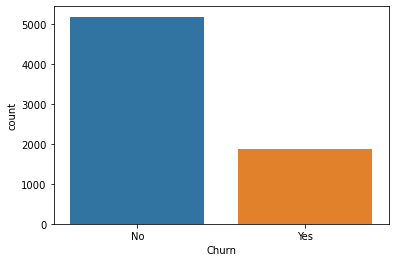

In [9]:
sns.countplot(x=df.Churn, data=df)

Die Klassenverteilung ist unausgeglichen - deutlich mehr Kunden wandern NICHT ab!

In [10]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
df[df["Churn"] == "Yes"].mean()

SeniorCitizen        0.254682
tenure              17.979133
MonthlyCharges      74.441332
TotalCharges      1531.796094
dtype: float64

In [12]:
df[df["Churn"] == "No"].mean()

SeniorCitizen        0.128721
tenure              37.569965
MonthlyCharges      61.265124
TotalCharges      2555.344141
dtype: float64

In [13]:
sns.pairplot(df, hue="Churn")

Erkenntnis: Spalte "Senior Citizen" muss kategorisch sein!

In [14]:
df.SeniorCitizen = df.SeniorCitizen.astype(str)

In [15]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
sns.heatmap(df.corr())

<AxesSubplot:>

Die stärkste Korrelation bei numerischen Spalten ergibt sich zwischen tenure und Total Charges. Dies ist ein logischer Zusammenhang - je länger ein Kunde dabei ist, desto größer der absolute Zahlungsbeitrag.

&emsp;

## Data_Preparation

<img src="Data_Preparation.PNG" alt="Drawing" align="left" style="width: 650px;"/>

**Aufgaben der Data Preparation Phase**:
- Dummy Encoding
- Umgang mit fehlenden Werten
- Train-Test-Split
- Standardisierung
- Feature Selection / Feature Extraction

### Trennung in Features und Labels

In [17]:
data = df.iloc[:, 0:19]

In [18]:
target = df.iloc[:, 19].values

### Dummy Encoding

In [19]:
data = pd.get_dummies(data)
data.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85              1            0   
1      34           56.95       1889.50              0            1   
2       2           53.85        108.15              0            1   
3      45           42.30       1840.75              0            1   
4       2           70.70        151.65              1            0   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  Dependents_No  \
0                1                0           0            1              1   
1                1                0           1            0              1   
2                1                0           1            0              1   
3                1                0           1            0              1   
4                1                0           1            0              1   

   ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0  ...                    0                        1                  0   
1  ...                    0                        0                  1   
2  ...                    0                        1                  0   
3  ...                    0                        0                  1   
4  ...                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

### Ersetzen fehlender Werte

In [20]:
data.fillna(data.mean(), inplace=True)

Fehlende Werte in der TotalCharges Spalte werden durch den Durchschnitt dieser Spalte ersetzt.

### Stratified Train Test Split

In [21]:
sss = StratifiedShuffleSplit(test_size = 0.3, random_state = 42)

Es wurde ein Stratified Train Test Split gewählt, da eine ungleiche Klassenverteilung vorherrscht.

In [22]:
data = data.values

In [23]:
for train_index, test_index in sss.split(data, target):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

In [24]:
X_train.shape

(4930, 46)

In [25]:
X_test.shape

(2113, 46)

In [26]:
y_train.shape

(4930,)

In [27]:
y_test.shape

(2113,)

### Standardisierung

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
print(np.nanmean(X_train))
print(np.nanstd(X_train))
print(np.nanmean(X_test))
print(np.nanstd(X_test))

-4.8611299697142404e-17
1.0000000000000053
-0.0012582345077045637
0.9972508547804831


&emsp;

### Exkurs: Beispielhafte Darstellung von Feature Scores mit F1 Feature Selection

In [71]:
sel_f1 = SelectKBest(f_classif, k=25).fit(X_train, y_train)

In [72]:
sel_f1.scores_

array([6.68531336e+02, 1.84331278e+02, 1.93887545e+02, 1.30318859e+00,
       1.30318859e+00, 1.04860932e+02, 1.04860932e+02, 9.98707506e+01,
       9.98707506e+01, 1.51731418e+02, 1.51731418e+02, 4.50362343e-01,
       4.50362343e-01, 1.02310940e+01, 4.50362343e-01, 1.33130024e+01,
       6.58048140e+01, 4.93099587e+02, 2.75057139e+02, 6.79270213e+02,
       2.75057139e+02, 1.56320434e+02, 4.25855940e+02, 2.75057139e+02,
       4.46776990e+01, 3.20221628e+02, 2.75057139e+02, 1.69530906e+01,
       6.15680491e+02, 2.75057139e+02, 1.25694164e+02, 9.57297414e+01,
       2.75057139e+02, 1.53907613e+01, 9.44233743e+01, 2.75057139e+02,
       1.59819765e+01, 9.46788313e+02, 1.47622099e+02, 5.03023429e+02,
       1.85613009e+02, 1.85613009e+02, 6.66551119e+01, 8.28570933e+01,
       4.87743200e+02, 4.67805720e+01])

In [73]:
sorted(sel_f1.scores_)

[0.4503623433959562,
 0.4503623433959562,
 0.4503623433959565,
 1.303188586971214,
 1.303188586971214,
 10.231094023806968,
 13.313002396156415,
 15.390761304823373,
 15.981976464039402,
 16.953090645515527,
 44.6776989532263,
 46.780571957392596,
 65.80481403597324,
 66.65511194852267,
 82.85709325185967,
 94.42337433315127,
 95.72974137800296,
 99.87075061939763,
 99.87075061939763,
 104.86093189167808,
 104.86093189167808,
 125.69416446671545,
 147.62209909910234,
 151.73141794804397,
 151.73141794804397,
 156.3204335361369,
 184.3312778377611,
 185.613008720652,
 185.613008720652,
 193.88754470758872,
 275.05713875549367,
 275.05713875549367,
 275.05713875549367,
 275.05713875549367,
 275.05713875549367,
 275.05713875549367,
 275.05713875549367,
 320.2216276855321,
 425.85594036427176,
 487.74319974918524,
 493.09958651083673,
 503.02342940403935,
 615.680491223538,
 668.531335828275,
 679.2702125041654,
 946.7883130892152]

In [74]:
list(sel_f1.scores_).index(946.7883130892152)

37

In [75]:
list(sel_f1.scores_).index(679.2702125041654)

19

In [76]:
original_df = pd.get_dummies(df.iloc[:, 0:19])
original_df.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85              1            0   
1      34           56.95       1889.50              0            1   
2       2           53.85        108.15              0            1   
3      45           42.30       1840.75              0            1   
4       2           70.70        151.65              1            0   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  Dependents_No  \
0                1                0           0            1              1   
1                1                0           1            0              1   
2                1                0           1            0              1   
3                1                0           1            0              1   
4                1                0           1            0              1   

   ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0  ...                    0                        1                  0   
1  ...                    0                        0                  1   
2  ...                    0                        1                  0   
3  ...                    0                        0                  1   
4  ...                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

In [77]:
print("Die beiden signifikantesten Features gemäß F1-Feature Selection sind: ",
      original_df.columns[19], "und", original_df.columns[37])
      

Die beiden signifikantesten Features gemäß F1-Feature Selection sind:  OnlineSecurity_No und Contract_Month-to-month


&emsp;

## Exkurs_Visualisierungen_mit_selbst_generierten_Daten

Inspiration für die Visualisierung von SVC Support Vektoren, Hyperebene und Margin: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html. Die Visualisierung wurde um eine selbt erstellte Dashboard-Funktionalität erweitert.

In [74]:
# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1.5
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 1000

# we create 1000 separable points
X, y = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

In [75]:
algs = ["SVC", "NuSVC", "LinearSVC"]
cs = [0.001, 0.01, 0.1, 1, 10, 100] # SVC und LinearSVC
gammas = ["scale", "auto", 0.001, 0.01, 1, 10, 100] # SVC und NuSvC
kernels = ["linear", "rbf", "poly", "sigmoid"] # SVC und NuSVC
class_weight = [None, "balanced"] # Alle

In [76]:
def plot_svc(X, y, alg1, alg2, linear1, linear2):
    if linear1 == True:
        fig = plt.figure(figsize=(16, 8))
        plt.subplot(1, 2, 1)
        plot_linearsvc(X, y, alg1, alg2, linear1, linear2)
        linear1 = False
        # ---
        
        if linear2 == True:
            plt.subplot(1, 2, 2)
            plot_linearsvc(X, y, alg1, alg2, linear1, linear2)
            plt.show()
            return
        
        plt.subplot(1, 2, 2)
        clf2 = alg2
        clf2.fit(X, y)

        plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

        # plot the decision function
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf2.decision_function(xy).reshape(XX.shape)
        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                       linestyles=['--', '-', '--'])
        # plot support vectors
        ax.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
                       linewidth=1, facecolors='none', edgecolors='k')

        plt.title(alg2)


        plt.show()
        return
    
        
        
    print(alg1)
    print(alg2)
    
    clf = alg1
    clf2 = alg2

    titles = ["Weighted Class Balance", "Unweighted Class Balance"]


    fig = plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)

    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')

    plt.title(alg1)

    # ---
    
    if linear2==True:
        plt.subplot(1, 2, 2)
        plot_linearsvc(X, y, alg1, alg2, linear1, linear2)
        plt.show()
        return
        

    plt.subplot(1, 2, 2)
    clf2.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf2.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')

    plt.title(alg2)


    plt.show()
    

In [77]:
def plot_linearsvc(X, y, alg1, alg2, linear1, linear2):
    if linear1 == True:
        clf = alg1
    else:
        clf = alg2 
    clf.fit(X, y)

    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                    linewidth=1, facecolors='none', edgecolors='k')
    plt.title(clf)

In [78]:
output = widgets.Output()

dropdown_algs1a = widgets.Dropdown(options=algs, description='Algorithm')
dropdown_algs1b = widgets.Dropdown(options=cs, description='C')
dropdown_algs1c = widgets.Dropdown(options=gammas, description='Gamma')
dropdown_algs1d = widgets.Dropdown(options=kernels, description='Kernel')
dropdown_algs1e = widgets.Dropdown(options=class_weight, description='Class Weight')

dropdown_algs2a = widgets.Dropdown(options=algs, description='Compare')
dropdown_algs2b = widgets.Dropdown(options=cs, description='C')
dropdown_algs2c = widgets.Dropdown(options=gammas, description='Gamma')
dropdown_algs2d = widgets.Dropdown(options=kernels, description='Kernel')
dropdown_algs2e = widgets.Dropdown(options=class_weight, description='Class Weight')

row1 = widgets.HBox([dropdown_algs1a, dropdown_algs2a])
row2 = widgets.HBox([dropdown_algs1b, dropdown_algs2b])
row3 = widgets.HBox([dropdown_algs1c, dropdown_algs2c])
row4 = widgets.HBox([dropdown_algs1d, dropdown_algs2d])
row5 = widgets.HBox([dropdown_algs1e, dropdown_algs2e])

def common_filtering(dropdown_algs1a, dropdown_algs1b, dropdown_algs1c, dropdown_algs1d, dropdown_algs1e,
                     dropdown_algs2a, dropdown_algs2b, dropdown_algs2c, dropdown_algs2d, dropdown_algs2e):
    output.clear_output()
    
    with output:
        if (dropdown_algs1a == "SVC") & (dropdown_algs2a == "SVC"):
            alg1 = SVC(C=dropdown_algs1b, gamma=dropdown_algs1c, kernel=dropdown_algs1d, class_weight=dropdown_algs1e)
            alg2 = SVC(C=dropdown_algs2b, gamma=dropdown_algs2c, kernel=dropdown_algs2d, class_weight=dropdown_algs2e)
            linear1 = False
            linear2 = False
        elif (dropdown_algs1a == "SVC") & (dropdown_algs2a == "NuSVC"):
            alg1 = SVC(C=dropdown_algs1b, gamma=dropdown_algs1c, kernel=dropdown_algs1d, class_weight=dropdown_algs1e)
            alg2 = NuSVC(gamma=dropdown_algs2c, kernel=dropdown_algs2d, class_weight=dropdown_algs2e)
            linear1 = False
            linear2 = False
        elif (dropdown_algs1a == "SVC") & (dropdown_algs2a == "LinearSVC"):
            alg1 = SVC(C=dropdown_algs1b, gamma=dropdown_algs1c, kernel=dropdown_algs1d, class_weight=dropdown_algs1e)
            alg2 = LinearSVC(C=dropdown_algs2b, class_weight=dropdown_algs2e)
            linear1 = False
            linear2 = True
        elif (dropdown_algs1a == "NuSVC") & (dropdown_algs2a == "SVC"):
            alg1 = NuSVC(gamma=dropdown_algs1c, kernel=dropdown_algs1d, class_weight=dropdown_algs1e)
            alg2 = SVC(C=dropdown_algs2b, gamma=dropdown_algs2c, kernel=dropdown_algs2d, class_weight=dropdown_algs2e)
            linear1 = False
            linear2 = False
        elif (dropdown_algs1a == "NuSVC") & (dropdown_algs2a == "NuSVC"):
            alg1 = NuSVC(gamma=dropdown_algs1c, kernel=dropdown_algs1d, class_weight=dropdown_algs1e)
            alg2 = NuSVC(gamma=dropdown_algs2c, kernel=dropdown_algs2d, class_weight=dropdown_algs2e)
            linear1 = False
            linear2 = False
        elif (dropdown_algs1a == "NuSVC") & (dropdown_algs2a == "LinearSVC"):
            alg1 = NuSVC(gamma=dropdown_algs1c, kernel=dropdown_algs1d, class_weight=dropdown_algs1e)
            alg2 = LinearSVC(C=dropdown_algs2b, class_weight=dropdown_algs2e)
            linear1 = False
            linear2 = True
        elif (dropdown_algs1a == "LinearSVC") & (dropdown_algs2a == "SVC"):
            alg1 = LinearSVC(C=dropdown_algs1b, class_weight=dropdown_algs1e)
            alg2 = SVC(C=dropdown_algs2b, gamma=dropdown_algs2c, kernel=dropdown_algs2d, class_weight=dropdown_algs2e)
            linear1 = True
            linear2 = False
        elif (dropdown_algs1a == "LinearSVC") & (dropdown_algs2a == "NuSVC"):
            alg1 = LinearSVC(C=dropdown_algs1b, class_weight=dropdown_algs1e)
            alg2 = NuSVC(gamma=dropdown_algs2c, kernel=dropdown_algs2d, class_weight=dropdown_algs2e)
            linear1 = True
            linear2 = False
        elif (dropdown_algs1a == "LinearSVC") & (dropdown_algs2a == "LinearSVC"):
            alg1 = LinearSVC(C=dropdown_algs1b, class_weight=dropdown_algs1e)
            alg2 = LinearSVC(C=dropdown_algs2b, class_weight=dropdown_algs2e)
            linear1 = True
            linear2 = True
        plot_svc(X, y, alg1, alg2, linear1, linear2)   
        

def dropdown_algs1a_eventhandler(change):
    common_filtering(change.new, dropdown_algs1b.value, dropdown_algs1c.value, dropdown_algs1d.value, dropdown_algs1e.value,
                     dropdown_algs2a.value, dropdown_algs2b.value, dropdown_algs2c.value, dropdown_algs2d.value, dropdown_algs2e.value)
    
def dropdown_algs1b_eventhandler(change):
    common_filtering(dropdown_algs1a.value, change.new, dropdown_algs1c.value, dropdown_algs1d.value, dropdown_algs1e.value,
                     dropdown_algs2a.value, dropdown_algs2b.value, dropdown_algs2c.value, dropdown_algs2d.value, dropdown_algs2e.value)
    
def dropdown_algs1c_eventhandler(change):
    common_filtering(dropdown_algs1a.value, dropdown_algs1b.value, change.new, dropdown_algs1d.value, dropdown_algs1e.value,
                     dropdown_algs2a.value, dropdown_algs2b.value, dropdown_algs2c.value, dropdown_algs2d.value, dropdown_algs2e.value)
    
def dropdown_algs1d_eventhandler(change):
    common_filtering(dropdown_algs1a.value, dropdown_algs1b.value, dropdown_algs1c.value, change.new, dropdown_algs1e.value,
                     dropdown_algs2a.value, dropdown_algs2b.value, dropdown_algs2c.value, dropdown_algs2d.value, dropdown_algs2e.value)
    
def dropdown_algs1e_eventhandler(change):
    common_filtering(dropdown_algs1a.value, dropdown_algs1b.value, dropdown_algs1c.value, dropdown_algs1d.value, change.new,
                     dropdown_algs2a.value, dropdown_algs2b.value, dropdown_algs2c.value, dropdown_algs2d.value, dropdown_algs2e.value)
    
    
    
def dropdown_algs2a_eventhandler(change):
    common_filtering(dropdown_algs1a.value, dropdown_algs1b.value, dropdown_algs1c.value, dropdown_algs1d.value, dropdown_algs1e.value,
                     change.new, dropdown_algs2b.value, dropdown_algs2c.value, dropdown_algs2d.value, dropdown_algs2e.value)
    
def dropdown_algs2b_eventhandler(change):
    common_filtering(dropdown_algs1a.value, dropdown_algs1b.value, dropdown_algs1c.value, dropdown_algs1d.value, dropdown_algs1e.value,
                     dropdown_algs2a.value, change.new, dropdown_algs2c.value, dropdown_algs2d.value, dropdown_algs2e.value)
    
def dropdown_algs2c_eventhandler(change):
    common_filtering(dropdown_algs1a.value, dropdown_algs1b.value, dropdown_algs1c.value, dropdown_algs1d.value, dropdown_algs1e.value,
                     dropdown_algs2a.value, dropdown_algs2b.value, change.new, dropdown_algs2d.value, dropdown_algs2e.value)
    
def dropdown_algs2d_eventhandler(change):
    common_filtering(dropdown_algs1a.value, dropdown_algs1b.value, dropdown_algs1c.value, dropdown_algs1d.value, dropdown_algs1e.value,
                     dropdown_algs2a.value, dropdown_algs2b.value, dropdown_algs2c.value, change.new, dropdown_algs2e.value)
    
def dropdown_algs2e_eventhandler(change):
    common_filtering(dropdown_algs1a.value, dropdown_algs1b.value, dropdown_algs1c.value, dropdown_algs1d.value, dropdown_algs1e.value,
                     dropdown_algs2a.value, dropdown_algs2b.value, dropdown_algs2c.value, dropdown_algs2d.value, change.new)
    
    
    

dropdown_algs1a.observe(dropdown_algs1a_eventhandler, names='value')
dropdown_algs1b.observe(dropdown_algs1b_eventhandler, names='value')
dropdown_algs1c.observe(dropdown_algs1c_eventhandler, names='value')
dropdown_algs1d.observe(dropdown_algs1d_eventhandler, names='value')
dropdown_algs1e.observe(dropdown_algs1e_eventhandler, names='value')

dropdown_algs2a.observe(dropdown_algs2a_eventhandler, names='value')
dropdown_algs2b.observe(dropdown_algs2b_eventhandler, names='value')
dropdown_algs2c.observe(dropdown_algs2c_eventhandler, names='value')
dropdown_algs2d.observe(dropdown_algs2d_eventhandler, names='value')
dropdown_algs2e.observe(dropdown_algs2e_eventhandler, names='value')

print ("Bitte beachten: NuSVC kennt Parameter C nicht. LinearSVC kennt Parameter Gamma und Kernel nicht.") 
print("Bei Auswahl eines der beiden Algorithmen hat eine Änderung dieser Parameter entsprechend keine Wirkung!")

display(row1)
display(row2)
display(row3)
display(row4)
display(row5)


display(output)

Bitte beachten: NuSVC kennt Parameter C nicht. LinearSVC kennt Parameter Gamma und Kernel nicht.
Bei Auswahl eines der beiden Algorithmen hat eine Änderung dieser Parameter entsprechend keine Wirkung!


Output()

&emsp;

## Modeling

<img src="CRISP_Modeling.PNG" alt="Drawing" align="left" style="width: 650px;"/>

**Aufgaben der Modeling Phase**:
- Hyperparameter Tuning unter Nutzung von Stratified Cross Validation innerhalb einer Pipeline
- für jeden Algorithmus wird auch ein Ansatz unter Nutzung von SMOTE (Synthetic Minority Oversampling Technique) optimiert
- Optimierung erfolgt basierend auf F1-Metrik, da die Klassen ungleich verteilt sind

### Modeling_NuSVC

In [30]:
warnings.filterwarnings('ignore')

sel_f1 = SelectKBest(f_classif, k=25)
ex_pca = PCA(n_components=15, random_state=42)

sel_ex = [sel_f1, ex_pca]

skf = StratifiedKFold(random_state=42)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
score_list = []

for i in sel_ex:
    pipe = Pipeline([("Sel_Ex", i),
                     ("Classifier", NuSVC(random_state=42))])
    score = cross_validate(pipe, X_train, y_train, cv=skf, n_jobs=-1, verbose=2, scoring=scoring, return_train_score=False)
    scores = [score["test_accuracy"].mean(), score["test_precision_weighted"].mean(),
              score["test_recall_weighted"].mean(), score["test_f1_weighted"].mean()]
    score_list.append(scores)

print(score_list)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[[0.791683569979716, 0.7779884866506447, 0.791683569979716, 0.7708375234218026], [0.7843813387423934, 0.7684060515922472, 0.7843813387423934, 0.7617849823721087]]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


### Iteration 1

In [79]:
pipe = Pipeline([("Extractor", SelectKBest(f_classif)),
                 ("Classifier", NuSVC(random_state=42))])

In [80]:
param_grid = {
                "Extractor__k": [5, 10, 15, 20, 25, 30, 35, 40, 46],
                "Classifier__nu": [0.1, 0.25, 0.5, 0.75, 0.9, 1],
                "Classifier__kernel": ["linear", "poly", "rbf"], 
                "Classifier__gamma": ["scale", "auto", 0.01, 0.1, 0.5, 1, 2, 5],
                "Classifier__class_weight": [None, "balanced"]
    }

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=200, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s


In [ ]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

In [ ]:
rand_results.to_pickle("NuSVC_Round1.pkl")

In [40]:
rand_results = pd.read_pickle("NuSVC_Round1.pkl")

In [41]:
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
93          0.787488        0.007218   
102         0.785666        0.004345   
25          0.785385        0.003286   
28          0.784657        0.001433   
184         0.784527        0.008577   
6           0.784255        0.002281   
66          0.784163        0.007980   
85          0.784153        0.001547   
122         0.769709        0.013372   
7           0.769709        0.013372   

                                                params  
93   {'Extractor__k': 40, 'Classifier__nu': 0.5, 'C...  
102  {'Extractor__k': 35, 'Classifier__nu': 0.5, 'C...  
25   {'Extractor__k': 25, 'Classifier__nu': 0.5, 'C...  
28   {'Extractor__k': 20, 'Classifier__nu': 0.5, 'C...  
184  {'Extractor__k': 30, 'Classifier__nu': 0.5, 'C...  
6    {'Extractor__k': 10, 'Classifier__nu': 0.5, 'C...  
66   {'Extractor__k': 46, 'Classifier__nu': 0.5, 'C...  
85   {'Extractor__k': 15, 'Classifier__nu': 0.5, 'C...  
122  {'Extractor__k': 30, 'Classifier__nu': 0.5, 'C...  
7    {'Extractor__k': 30, 'Classifier__nu': 0.5, 'C...

In [42]:
print(rand_results["params"][93])
print(rand_results["params"][102])
print(rand_results["params"][25])

{'Extractor__k': 40, 'Classifier__nu': 0.5, 'Classifier__kernel': 'linear', 'Classifier__gamma': 'scale', 'Classifier__class_weight': 'balanced'}
{'Extractor__k': 35, 'Classifier__nu': 0.5, 'Classifier__kernel': 'linear', 'Classifier__gamma': 'scale', 'Classifier__class_weight': None}
{'Extractor__k': 25, 'Classifier__nu': 0.5, 'Classifier__kernel': 'linear', 'Classifier__gamma': 'scale', 'Classifier__class_weight': 'balanced'}


### Iteration 2

In [43]:
pipe = Pipeline([("Extractor", SelectKBest(f_classif)),
                 ("Classifier", NuSVC(random_state=42))])

In [44]:
param_grid = {
                "Extractor__k": [25, 30, 35, 40, 46],
                "Classifier__nu": [0.25, 0.4, 0.5, 0.6, 0.75],
                "Classifier__kernel": ["linear"], 
                "Classifier__gamma": ["scale", "auto"],
                "Classifier__class_weight": [None, "balanced"]
    }

In [45]:
skf = StratifiedKFold(n_splits=3, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_jobs=-1, verbose=5,  return_train_score=False)

grid.fit(X_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   26.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('Extractor', SelectKBest()),
                                       ('Classifier', NuSVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'Classifier__class_weight': [None, 'balanced'],
                         'Classifier__gamma': ['scale', 'auto'],
                         'Classifier__kernel': ['linear'],
                         'Classifier__nu': [0.25, 0.4, 0.5, 0.6, 0.75],
                         'Extractor__k': [25, 30, 35, 40, 46]},
             scoring='f1_weighted', verbose=5)

In [46]:
grid_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
grid_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
88         0.787488        0.007218   
63         0.787488        0.007218   
13         0.787488        0.007218   
38         0.787488        0.007218   
37         0.785666        0.004345   
87         0.785666        0.004345   
62         0.785666        0.004345   
12         0.785666        0.004345   
10         0.785385        0.003286   
85         0.785385        0.003286   

                                               params  
88  {'Classifier__class_weight': 'balanced', 'Clas...  
63  {'Classifier__class_weight': 'balanced', 'Clas...  
13  {'Classifier__class_weight': None, 'Classifier...  
38  {'Classifier__class_weight': None, 'Classifier...  
37  {'Classifier__class_weight': None, 'Classifier...  
87  {'Classifier__class_weight': 'balanced', 'Clas...  
62  {'Classifier__class_weight': 'balanced', 'Clas...  
12  {'Classifier__class_weight': None, 'Classifier...  
10  {'Classifier__class_weight': None, 'Classifier...  
85  {'Classifier__class_weight': 'balanced', 'Clas...

In [47]:
print(grid_results["params"][88])
print(grid_results["params"][63])
print(grid_results["params"][13])

{'Classifier__class_weight': 'balanced', 'Classifier__gamma': 'auto', 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}
{'Classifier__class_weight': 'balanced', 'Classifier__gamma': 'scale', 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}
{'Classifier__class_weight': None, 'Classifier__gamma': 'scale', 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}


### Iteration 3

In [48]:
param_grid = {
                "Extractor__k": [38, 39, 40, 41, 42],
                "Classifier__nu": [0.5],
                "Classifier__kernel": ["linear"], 
                "Classifier__gamma": ["scale", "auto"],
                "Classifier__class_weight": ["balanced"]
    }

In [49]:
skf = StratifiedKFold(n_splits=3, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_jobs=-1, verbose=5,  return_train_score=False)

grid.fit(X_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('Extractor', SelectKBest()),
                                       ('Classifier', NuSVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'Classifier__class_weight': ['balanced'],
                         'Classifier__gamma': ['scale', 'auto'],
                         'Classifier__kernel': ['linear'],
                         'Classifier__nu': [0.5],
                         'Extractor__k': [38, 39, 40, 41, 42]},
             scoring='f1_weighted', verbose=5)

In [50]:
grid_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
grid_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
2         0.787488        0.007218   
7         0.787488        0.007218   
1         0.787318        0.006227   
6         0.787318        0.006227   
0         0.785705        0.005323   
5         0.785705        0.005323   
3         0.785648        0.007128   
8         0.785648        0.007128   
4         0.784893        0.008260   
9         0.784893        0.008260   

                                              params  
2  {'Classifier__class_weight': 'balanced', 'Clas...  
7  {'Classifier__class_weight': 'balanced', 'Clas...  
1  {'Classifier__class_weight': 'balanced', 'Clas...  
6  {'Classifier__class_weight': 'balanced', 'Clas...  
0  {'Classifier__class_weight': 'balanced', 'Clas...  
5  {'Classifier__class_weight': 'balanced', 'Clas...  
3  {'Classifier__class_weight': 'balanced', 'Clas...  
8  {'Classifier__class_weight': 'balanced', 'Clas...  
4  {'Classifier__class_weight': 'balanced', 'Clas...  
9  {'Classifier__class_weight': 'balanced', 'Clas...

In [51]:
print(grid_results["params"][2])
print(grid_results["params"][7])

{'Classifier__class_weight': 'balanced', 'Classifier__gamma': 'scale', 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}
{'Classifier__class_weight': 'balanced', 'Classifier__gamma': 'auto', 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}


### Iteration 4

In [52]:
# Test mit anderen Gamma Werten
param_grid = {
                "Extractor__k": [38, 39, 40, 41, 42],
                "Classifier__nu": [0.5],
                "Classifier__kernel": ["linear"], 
                "Classifier__gamma": ["scale", "auto", 0.1, 1, 2],
                "Classifier__class_weight": ["balanced"]
    }

In [53]:
skf = StratifiedKFold(n_splits=3, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_jobs=-1, verbose=5,  return_train_score=False)

grid.fit(X_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   12.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('Extractor', SelectKBest()),
                                       ('Classifier', NuSVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'Classifier__class_weight': ['balanced'],
                         'Classifier__gamma': ['scale', 'auto', 0.1, 1, 2],
                         'Classifier__kernel': ['linear'],
                         'Classifier__nu': [0.5],
                         'Extractor__k': [38, 39, 40, 41, 42]},
             scoring='f1_weighted', verbose=5)

In [54]:
grid_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
grid_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
12         0.787488        0.007218   
2          0.787488        0.007218   
22         0.787488        0.007218   
7          0.787488        0.007218   
17         0.787488        0.007218   
1          0.787318        0.006227   
21         0.787318        0.006227   
6          0.787318        0.006227   
16         0.787318        0.006227   
11         0.787318        0.006227   

                                               params  
12  {'Classifier__class_weight': 'balanced', 'Clas...  
2   {'Classifier__class_weight': 'balanced', 'Clas...  
22  {'Classifier__class_weight': 'balanced', 'Clas...  
7   {'Classifier__class_weight': 'balanced', 'Clas...  
17  {'Classifier__class_weight': 'balanced', 'Clas...  
1   {'Classifier__class_weight': 'balanced', 'Clas...  
21  {'Classifier__class_weight': 'balanced', 'Clas...  
6   {'Classifier__class_weight': 'balanced', 'Clas...  
16  {'Classifier__class_weight': 'balanced', 'Clas...  
11  {'Classifier__class_weight': 'balanced', 'Clas...

In [56]:
print(grid_results["params"][12])
print(grid_results["params"][2])
print(grid_results["params"][22])
print(grid_results["params"][7])
print(grid_results["params"][17])

{'Classifier__class_weight': 'balanced', 'Classifier__gamma': 0.1, 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}
{'Classifier__class_weight': 'balanced', 'Classifier__gamma': 'scale', 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}
{'Classifier__class_weight': 'balanced', 'Classifier__gamma': 2, 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}
{'Classifier__class_weight': 'balanced', 'Classifier__gamma': 'auto', 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}
{'Classifier__class_weight': 'balanced', 'Classifier__gamma': 1, 'Classifier__kernel': 'linear', 'Classifier__nu': 0.5, 'Extractor__k': 40}


### Iteration 1b (SMOTE)

In [30]:
smote = SMOTE(random_state=42)
nusvc = NuSVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, nusvc)

In [31]:
param_grid = {
                "smote__sampling_strategy": [0.5, 0.6, 0.7], 
                "selectkbest__k": [10, 15, 20, 25, 30, 35, 40, 46],
                "nusvc__nu": [0.5],
                "nusvc__kernel": ["linear"], 
                "nusvc__gamma": ["scale", "auto"],
                "nusvc__class_weight": [None, "balanced"]
    }

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=15, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s


In [33]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
4         0.786333        0.002363   
3         0.773108        0.011895   
0         0.726967        0.025069   
1         0.712780        0.067500   
2         0.695583        0.096915   

                                              params  
4  {'smote__sampling_strategy': 0.5, 'selectkbest...  
3  {'smote__sampling_strategy': 0.6, 'selectkbest...  
0  {'smote__sampling_strategy': 0.7, 'selectkbest...  
1  {'smote__sampling_strategy': 0.7, 'selectkbest...  
2  {'smote__sampling_strategy': 0.6, 'selectkbest...

In [34]:
print(rand_results["params"][4])
print(rand_results["params"][3])
print(rand_results["params"][0])

{'smote__sampling_strategy': 0.5, 'selectkbest__k': 25, 'nusvc__nu': 0.5, 'nusvc__kernel': 'linear', 'nusvc__gamma': 'auto', 'nusvc__class_weight': None}
{'smote__sampling_strategy': 0.6, 'selectkbest__k': 46, 'nusvc__nu': 0.5, 'nusvc__kernel': 'linear', 'nusvc__gamma': 'auto', 'nusvc__class_weight': 'balanced'}
{'smote__sampling_strategy': 0.7, 'selectkbest__k': 20, 'nusvc__nu': 0.5, 'nusvc__kernel': 'linear', 'nusvc__gamma': 'auto', 'nusvc__class_weight': 'balanced'}


### Iteration 2b

In [31]:
smote = SMOTE(random_state=42)
nusvc = NuSVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, nusvc)

In [32]:
param_grid = {
                "smote__sampling_strategy": [0.5], 
                "selectkbest__k": [20, 25, 30, 35, 40, 46],
                "nusvc__nu": [0.5],
                "nusvc__kernel": ["linear"], 
                "nusvc__gamma": ["auto"],
                "nusvc__class_weight": [None, "balanced"]
    }

In [33]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=12, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   10.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('nusvc',
                                              NuSVC(random_state=42))]),
                   n_iter=12, n_jobs=-1,
                   param_distributions={'nusvc__class_weight': [None,
                                                                'balanced'],
                                        'nusvc__gamma': ['auto'],
                                        'nusvc__kernel': ['linear'],
                                        'nusvc__nu': [0.5],
                                        'selectkbest__k': [20, 25, 30, 35, 40,
                                                           46],
                                        'smote__sampling_strategy': [0.5]},
                   random_stat

In [34]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
1          0.786333        0.002363   
7          0.786333        0.002363   
4          0.786187        0.003830   
10         0.786187        0.003830   
5          0.785045        0.002098   
11         0.785045        0.002098   
3          0.784746        0.001843   
9          0.784746        0.001843   
2          0.781865        0.004190   
8          0.781865        0.004190   

                                               params  
1   {'smote__sampling_strategy': 0.5, 'selectkbest...  
7   {'smote__sampling_strategy': 0.5, 'selectkbest...  
4   {'smote__sampling_strategy': 0.5, 'selectkbest...  
10  {'smote__sampling_strategy': 0.5, 'selectkbest...  
5   {'smote__sampling_strategy': 0.5, 'selectkbest...  
11  {'smote__sampling_strategy': 0.5, 'selectkbest...  
3   {'smote__sampling_strategy': 0.5, 'selectkbest...  
9   {'smote__sampling_strategy': 0.5, 'selectkbest...  
2   {'smote__sampling_strategy': 0.5, 'selectkbest...  
8   {'smote__sampling_strategy': 0.5, 'selectkbest...

In [35]:
print(rand_results["params"][1])
print(rand_results["params"][7])

{'smote__sampling_strategy': 0.5, 'selectkbest__k': 25, 'nusvc__nu': 0.5, 'nusvc__kernel': 'linear', 'nusvc__gamma': 'auto', 'nusvc__class_weight': None}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 25, 'nusvc__nu': 0.5, 'nusvc__kernel': 'linear', 'nusvc__gamma': 'auto', 'nusvc__class_weight': 'balanced'}


### Iteration 3b

In [36]:
smote = SMOTE(random_state=42)
nusvc = NuSVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, nusvc)

In [37]:
param_grid = {
                "smote__sampling_strategy": [0.5], 
                "selectkbest__k": [23, 24, 25, 26, 27],
                "nusvc__nu": [0.4, 0.5, 0.6],
                "nusvc__kernel": ["linear"], 
                "nusvc__gamma": ["auto"],
                "nusvc__class_weight": [None]
    }

In [38]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=15, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.8s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('nusvc',
                                              NuSVC(random_state=42))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'nusvc__class_weight': [None],
                                        'nusvc__gamma': ['auto'],
                                        'nusvc__kernel': ['linear'],
                                        'nusvc__nu': [0.4, 0.5, 0.6],
                                        'selectkbest__k': [23, 24, 25, 26, 27],
                                        'smote__sampling_strategy': [0.5]},
                   random_state=42, scoring='f1_weighted', verbose=5)

In [39]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
13         0.787056        0.003527   
10         0.786957        0.006097   
11         0.786797        0.004133   
7          0.786333        0.002363   
12         0.786048        0.003434   
6          0.785822        0.002755   
14         0.785736        0.003109   
5          0.785589        0.003279   
8          0.784994        0.003487   
9          0.783932        0.001737   

                                               params  
13  {'smote__sampling_strategy': 0.5, 'selectkbest...  
10  {'smote__sampling_strategy': 0.5, 'selectkbest...  
11  {'smote__sampling_strategy': 0.5, 'selectkbest...  
7   {'smote__sampling_strategy': 0.5, 'selectkbest...  
12  {'smote__sampling_strategy': 0.5, 'selectkbest...  
6   {'smote__sampling_strategy': 0.5, 'selectkbest...  
14  {'smote__sampling_strategy': 0.5, 'selectkbest...  
5   {'smote__sampling_strategy': 0.5, 'selectkbest...  
8   {'smote__sampling_strategy': 0.5, 'selectkbest...  
9   {'smote__sampling_strategy': 0.5, 'selectkbest...

In [40]:
print(rand_results["params"][13])
print(rand_results["params"][10])
print(rand_results["params"][11])

{'smote__sampling_strategy': 0.5, 'selectkbest__k': 26, 'nusvc__nu': 0.6, 'nusvc__kernel': 'linear', 'nusvc__gamma': 'auto', 'nusvc__class_weight': None}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 23, 'nusvc__nu': 0.6, 'nusvc__kernel': 'linear', 'nusvc__gamma': 'auto', 'nusvc__class_weight': None}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 24, 'nusvc__nu': 0.6, 'nusvc__kernel': 'linear', 'nusvc__gamma': 'auto', 'nusvc__class_weight': None}


### Iteration 4b

In [41]:
smote = SMOTE(random_state=42)
nusvc = NuSVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, nusvc)

In [42]:
param_grid = {
                "smote__sampling_strategy": [0.5], 
                "selectkbest__k": [23, 24, 25, 26, 27],
                "nusvc__nu": [0.6, 0.65, 0.7, 0.75],
                "nusvc__kernel": ["linear"], 
                "nusvc__gamma": ["auto"],
                "nusvc__class_weight": [None]
    }

In [43]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=20, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.2s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('nusvc',
                                              NuSVC(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'nusvc__class_weight': [None],
                                        'nusvc__gamma': ['auto'],
                                        'nusvc__kernel': ['linear'],
                                        'nusvc__nu': [0.6, 0.65, 0.7, 0.75],
                                        'selectkbest__k': [23, 24, 25, 26, 27],
                                        'smote__sampling_strategy': [0.5]},
                   random_state=42, scoring='f1_weighted', verbose=5)

In [44]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
3         0.787056        0.003527   
0         0.786957        0.006097   
1         0.786797        0.004133   
2         0.786048        0.003434   
4         0.785736        0.003109   
5         0.784770        0.006102   
6         0.784179        0.003019   
8         0.782154        0.004333   
9         0.782042        0.005490   
7         0.781667        0.004920   

                                              params  
3  {'smote__sampling_strategy': 0.5, 'selectkbest...  
0  {'smote__sampling_strategy': 0.5, 'selectkbest...  
1  {'smote__sampling_strategy': 0.5, 'selectkbest...  
2  {'smote__sampling_strategy': 0.5, 'selectkbest...  
4  {'smote__sampling_strategy': 0.5, 'selectkbest...  
5  {'smote__sampling_strategy': 0.5, 'selectkbest...  
6  {'smote__sampling_strategy': 0.5, 'selectkbest...  
8  {'smote__sampling_strategy': 0.5, 'selectkbest...  
9  {'smote__sampling_strategy': 0.5, 'selectkbest...  
7  {'smote__sampling_strategy': 0.5, 'selectkbest...

In [45]:
print(rand_results["params"][3])

{'smote__sampling_strategy': 0.5, 'selectkbest__k': 26, 'nusvc__nu': 0.6, 'nusvc__kernel': 'linear', 'nusvc__gamma': 'auto', 'nusvc__class_weight': None}


&emsp;

### Modeling_SVC

In [31]:
warnings.filterwarnings('ignore')

sel_f1 = SelectKBest(f_classif, k=25)
ex_pca = PCA(n_components=15, random_state=42)

sel_ex = [sel_f1, ex_pca]

skf = StratifiedKFold(random_state=42)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
score_list = []

for i in sel_ex:
    pipe = Pipeline([("Sel_Ex", i),
                     ("Classifier", SVC(random_state=42))])
    score = cross_validate(pipe, X_train, y_train, cv=skf, n_jobs=-1, verbose=2, scoring=scoring, return_train_score=False)
    scores = [score["test_accuracy"].mean(), score["test_precision_weighted"].mean(),
              score["test_recall_weighted"].mean(), score["test_f1_weighted"].mean()]
    score_list.append(scores)

print(score_list)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[[0.7967545638945233, 0.7847887620566913, 0.7967545638945233, 0.7855079564603413], [0.7906693711967545, 0.7769890513404175, 0.7906693711967545, 0.7774230007490446]]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


### Iteration 1 

In [ ]:
pipe = Pipeline([("Extractor", SelectKBest(f_classif)),
                 ("Classifier", SVC(random_state=42))])

In [ ]:
param_grid = {
                "Extractor__k": [5, 10, 15, 20, 25, 30, 35, 40, 46],
                "Classifier__C": [0.01, 0.1, 0.5, 1, 2, 5],
                "Classifier__kernel": ["linear", "poly", "rbf"], 
                "Classifier__gamma": ["scale", "auto", 0.01, 0.1, 0.5, 1, 2, 5],
                "Classifier__class_weight": [None, "balanced"]
    }

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=200, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

In [ ]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

In [ ]:
rand_results.to_pickle("SVC_Round1.pkl")

In [30]:
rand_results = pd.read_pickle("SVC_Round1.pkl")

In [32]:
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
35          0.790385        0.005988   
193         0.790274        0.006659   
96          0.790274        0.006659   
134         0.789206        0.005653   
190         0.789206        0.005653   
49          0.789106        0.007181   
79          0.789106        0.007181   
69          0.788442        0.007947   
168         0.787704        0.006438   
3           0.785912        0.002997   

                                                params  
35   {'Extractor__k': 46, 'Classifier__kernel': 'li...  
193  {'Extractor__k': 46, 'Classifier__kernel': 'li...  
96   {'Extractor__k': 46, 'Classifier__kernel': 'li...  
134  {'Extractor__k': 46, 'Classifier__kernel': 'li...  
190  {'Extractor__k': 46, 'Classifier__kernel': 'li...  
49   {'Extractor__k': 40, 'Classifier__kernel': 'li...  
79   {'Extractor__k': 40, 'Classifier__kernel': 'li...  
69   {'Extractor__k': 40, 'Classifier__kernel': 'li...  
168  {'Extractor__k': 40, 'Classifier__kernel': 'li...  
3    {'Extractor__k': 10, 'Classifier__kernel': 'rb...

In [36]:
print(rand_results["params"][35])
print(rand_results["params"][193])
print(rand_results["params"][96])
print(rand_results["params"][134])
print(rand_results["params"][190])

{'Extractor__k': 46, 'Classifier__kernel': 'linear', 'Classifier__gamma': 2, 'Classifier__class_weight': None, 'Classifier__C': 0.01}
{'Extractor__k': 46, 'Classifier__kernel': 'linear', 'Classifier__gamma': 0.1, 'Classifier__class_weight': None, 'Classifier__C': 2}
{'Extractor__k': 46, 'Classifier__kernel': 'linear', 'Classifier__gamma': 'scale', 'Classifier__class_weight': None, 'Classifier__C': 2}
{'Extractor__k': 46, 'Classifier__kernel': 'linear', 'Classifier__gamma': 2, 'Classifier__class_weight': None, 'Classifier__C': 0.1}
{'Extractor__k': 46, 'Classifier__kernel': 'linear', 'Classifier__gamma': 0.1, 'Classifier__class_weight': None, 'Classifier__C': 0.1}


### Iteration 2

In [43]:
pipe = Pipeline([("Extractor", SelectKBest(f_classif)),
                 ("Classifier", SVC(random_state=42))])

In [44]:
param_grid = {
                "Extractor__k": [46],
                "Classifier__C": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 3],
                "Classifier__kernel": ["linear"], 
                "Classifier__gamma": ["scale", "auto", 0.05, 0.1, 1, 2, 3],
                "Classifier__class_weight": [None]
    }

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_jobs=-1, verbose=5, return_train_score=False)

grid.fit(X_train, y_train)

In [ ]:
grid_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
grid_results.sort_values('mean_test_score', ascending=False).head(10)

In [ ]:
grid_results.to_pickle("SVC_Round2.pkl")

In [17]:
grid_results = pd.read_pickle("SVC_Round2.pkl")

In [18]:
grid_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
15         0.790385        0.005988   
14         0.790385        0.005988   
20         0.790385        0.005988   
19         0.790385        0.005988   
18         0.790385        0.005988   
17         0.790385        0.005988   
16         0.790385        0.005988   
49         0.790274        0.006659   
55         0.790274        0.006659   
54         0.790274        0.006659   

                                               params  
15  {'Classifier__C': 0.01, 'Classifier__class_wei...  
14  {'Classifier__C': 0.01, 'Classifier__class_wei...  
20  {'Classifier__C': 0.01, 'Classifier__class_wei...  
19  {'Classifier__C': 0.01, 'Classifier__class_wei...  
18  {'Classifier__C': 0.01, 'Classifier__class_wei...  
17  {'Classifier__C': 0.01, 'Classifier__class_wei...  
16  {'Classifier__C': 0.01, 'Classifier__class_wei...  
49  {'Classifier__C': 2, 'Classifier__class_weight...  
55  {'Classifier__C': 2, 'Classifier__class_weight...  
54  {'Classifier__C': 2, 'Classifier__class_weight...

In [19]:
print(grid_results["params"][15])
print(grid_results["params"][14])
print(grid_results["params"][20])

{'Classifier__C': 0.01, 'Classifier__class_weight': None, 'Classifier__gamma': 'auto', 'Classifier__kernel': 'linear', 'Extractor__k': 46}
{'Classifier__C': 0.01, 'Classifier__class_weight': None, 'Classifier__gamma': 'scale', 'Classifier__kernel': 'linear', 'Extractor__k': 46}
{'Classifier__C': 0.01, 'Classifier__class_weight': None, 'Classifier__gamma': 3, 'Classifier__kernel': 'linear', 'Extractor__k': 46}


### Iteration 1b (SMOTE)

In [ ]:
smote = SMOTE(random_state=42)
svc = SVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, svc)

In [ ]:
param_grid = {
                "smote__sampling_strategy": [0.5, 0.6, 0.7, 0.8, 0.9],
                "selectkbest__k": [5, 10, 15, 20, 25, 30, 35, 40, 46],
                "svc__C": [0.01, 0.1, 0.5, 1, 2],
                "svc__kernel": ["linear", "poly", "rbf"], 
                "svc__gamma": ["scale", "auto"],
                "svc__class_weight": [None, "balanced"]
    }

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=50, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

In [ ]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

In [ ]:
rand_results.to_pickle("SVC_Round1b.pkl")

In [49]:
grid_results = pd.read_pickle("SVC_Round1b.pkl")

In [50]:
grid_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
40         0.792624        0.002440   
10         0.789024        0.005784   
28         0.782460        0.001607   
9          0.780012        0.003233   
37         0.776609        0.005829   
34         0.774238        0.005906   
25         0.773190        0.005106   
16         0.772340        0.008483   
2          0.772167        0.008517   
27         0.771935        0.006883   

                                               params  
40  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
10  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
28  {'svc__kernel': 'rbf', 'svc__gamma': 'auto', '...  
9   {'svc__kernel': 'poly', 'svc__gamma': 'auto', ...  
37  {'svc__kernel': 'rbf', 'svc__gamma': 'auto', '...  
34  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
25  {'svc__kernel': 'rbf', 'svc__gamma': 'auto', '...  
16  {'svc__kernel': 'rbf', 'svc__gamma': 'auto', '...  
2   {'svc__kernel': 'rbf', 'svc__gamma': 'scale', ...  
27  {'svc__kernel': 'poly', 'svc__gamma': 'scale',...

In [51]:
print(grid_results["params"][40])
print(grid_results["params"][10])
print(grid_results["params"][28])

{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__class_weight': None, 'svc__C': 0.5, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 10}
{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 0.01, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 30}
{'svc__kernel': 'rbf', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 0.01, 'smote__sampling_strategy': 0.6, 'selectkbest__k': 10}


### Iteration 2b

In [54]:
smote = SMOTE(random_state=42)
svc = SVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, svc)

In [55]:
param_grid = {
                "smote__sampling_strategy": [0.5, 0.6],
                "selectkbest__k": [5, 10, 15, 20, 25, 30, 35, 40, 46],
                "svc__C": [0.001, 0.01, 0.1, 0.5, 1],
                "svc__kernel": ["linear", "rbf"], 
                "svc__gamma": ["scale", "auto"],
                "svc__class_weight": [None]
    }

In [56]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=50, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   37.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'selectkbest__k': [5, 10, 15, 20, 25,
                                                           30, 35, 40, 46],
                                        'smote__sampling_strategy': [0.5, 0.6],
                                        'svc__C': [0.001, 0.01, 0.1, 0.5, 1],
                                        'svc__class_weight': [None],
                                        'svc__gamma': ['scale', 'auto'],
                                        'svc__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='f1_weighted', verbose=5)

In [57]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
39         0.792887        0.003365   
4          0.792624        0.002440   
38         0.792624        0.002440   
15         0.791235        0.001864   
9          0.791235        0.001864   
8          0.788708        0.003955   
12         0.788510        0.005116   
13         0.788397        0.005240   
42         0.788221        0.003295   
24         0.788041        0.001205   

                                               params  
39  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
4   {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
38  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
15  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
9   {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
8   {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
12  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
13  {'svc__kernel': 'rbf', 'svc__gamma': 'auto', '...  
42  {'svc__kernel': 'rbf', 'svc__gamma': 'scale', ...  
24  {'svc__kernel': 'rbf', 'svc__gamma': 'scale', ...

In [59]:
print(rand_results["params"][39])
print(rand_results["params"][4])
print(rand_results["params"][38])

{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 0.1, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 15}
{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__class_weight': None, 'svc__C': 1, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 10}
{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 0.5, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 15}


### Iteration 3b

In [61]:
smote = SMOTE(random_state=42)
svc = SVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, svc)

In [62]:
param_grid = {
                "smote__sampling_strategy": [0.5],
                "selectkbest__k": [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40],
                "svc__C": [0.05, 0.1, 0.2, 0.3, 0.5, 1],
                "svc__kernel": ["linear"], 
                "svc__gamma": ["scale", "auto"],
                "svc__class_weight": [None]
    }

In [63]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=50, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   20.9s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'selectkbest__k': [8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 30, 40],
                                        'smote__sampling_strategy': [0.5],
                                        'svc__C': [0.05, 0.1, 0.2, 0.3, 0.5, 1],
                                        'svc__class_weight': [None],
                                        'svc__gamma': ['scale', 'auto'],
                                        'svc__kernel': ['linear']},
                   random_state=42, sco

In [64]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
24         0.794178        0.002352   
15         0.794087        0.003200   
0          0.794086        0.003524   
27         0.794086        0.003524   
32         0.793613        0.004369   
43         0.793462        0.002248   
20         0.793462        0.002248   
18         0.793462        0.002248   
5          0.793415        0.003712   
2          0.793346        0.004700   

                                               params  
24  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
15  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
0   {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
27  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
32  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
43  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
20  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
18  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
5   {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
2   {'svc__kernel': 'linear', 'svc__gamma': 'auto'...

In [65]:
print(rand_results["params"][24])
print(rand_results["params"][15])
print(rand_results["params"][0])

{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 0.5, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 8}
{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__class_weight': None, 'svc__C': 0.2, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 9}
{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 0.3, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 9}


### Iteration 4b

In [69]:
smote = SMOTE(random_state=42)
svc = SVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, svc)

In [70]:
param_grid = {
                "smote__sampling_strategy": [0.5],
                "selectkbest__k": [6, 7, 8, 9, 10],
                "svc__C": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                "svc__kernel": ["linear"], 
                "svc__gamma": ["scale", "auto"],
                "svc__class_weight": [None]
    }

In [71]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=70, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   25.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=70, n_jobs=-1,
                   param_distributions={'selectkbest__k': [6, 7, 8, 9, 10],
                                        'smote__sampling_strategy': [0.5],
                                        'svc__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                   0.7],
                                        'svc__class_weight': [None],
                                        'svc__gamma': ['scale', 'auto'],
                                        'svc__kernel': ['linear']},
                   random_state=42, scoring='f1_weighted', verbose=5)

In [72]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
31         0.794753        0.002693   
30         0.794753        0.002693   
29         0.794625        0.002123   
28         0.794625        0.002123   
38         0.794581        0.002514   
39         0.794581        0.002514   
34         0.794575        0.002634   
35         0.794575        0.002634   
40         0.794356        0.002408   
41         0.794356        0.002408   

                                               params  
31  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
30  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
29  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
28  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
38  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
39  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
34  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
35  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
40  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
41  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...

In [74]:
print(rand_results["params"][31])
print(rand_results["params"][30])
print(rand_results["params"][29])

{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 0.2, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 8}
{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__class_weight': None, 'svc__C': 0.2, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 8}
{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 0.1, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 8}


### Iteration 1c (Optimierung auf F1_Makro)

In [31]:
smote = SMOTE(random_state=42)
svc = SVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, svc)

In [32]:
param_grid = {
                "smote__sampling_strategy": [0.5, 0.6, 0.7, 0.8, 0.9],
                "selectkbest__k": [5, 10, 15, 20, 25, 30, 35, 40, 46],
                "svc__C": [0.01, 0.1, 0.5, 1, 2],
                "svc__kernel": ["linear", "poly", "rbf"], 
                "svc__gamma": ["scale", "auto"],
                "svc__class_weight": [None, "balanced"]
    }

In [33]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_macro', n_iter=100, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'selectkbest__k': [5, 10, 15, 20, 25,
                                                           30, 35, 40, 46],
                                        'smote__sampling_strategy': [0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],
                                        'svc__C': [0.01, 0.1, 0.5, 1, 2],
                                        'svc__class_weight': [None, 'balanced'],
                                        'svc__gamma': ['scale', 'auto'],
                         

In [34]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
40         0.737802        0.002885   
64         0.737802        0.002885   
92         0.736059        0.003801   
10         0.733276        0.008506   
79         0.730513        0.007057   
59         0.729667        0.006648   
96         0.728409        0.004017   
73         0.728358        0.002079   
87         0.727084        0.004778   
37         0.726985        0.005796   

                                               params  
40  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
64  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
92  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
10  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
79  {'svc__kernel': 'rbf', 'svc__gamma': 'auto', '...  
59  {'svc__kernel': 'rbf', 'svc__gamma': 'scale', ...  
96  {'svc__kernel': 'poly', 'svc__gamma': 'scale',...  
73  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
87  {'svc__kernel': 'rbf', 'svc__gamma': 'auto', '...  
37  {'svc__kernel': 'rbf', 'svc__gamma': 'auto', '...

In [35]:
print(rand_results["params"][40])
print(rand_results["params"][64])
print(rand_results["params"][92])

{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__class_weight': None, 'svc__C': 0.5, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 10}
{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 2, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 15}
{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__class_weight': None, 'svc__C': 0.01, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 20}


### Iteration 2c

In [37]:
smote = SMOTE(random_state=42)
svc = SVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, svc)

In [38]:
param_grid = {
                "smote__sampling_strategy": [0.5, 0.6],
                "selectkbest__k": [5, 8, 10, 12, 15, 18, 20, 25],
                "svc__C": [0.001, 0.01, 0.1, 0.5, 1, 2, 3],
                "svc__kernel": ["linear"], 
                "svc__gamma": ["scale", "auto"],
                "svc__class_weight": [None]
    }

In [39]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_macro', n_iter=100, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   56.4s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'selectkbest__k': [5, 8, 10, 12, 15, 18,
                                                           20, 25],
                                        'smote__sampling_strategy': [0.5, 0.6],
                                        'svc__C': [0.001, 0.01, 0.1, 0.5, 1, 2,
                                                   3],
                                        'svc__class_weight': [None],
                                        'svc__gamma': ['scale', 'auto'],
                                        'svc__kernel': ['linear']},
                   random_state=42, scoring='f1_macro', verbose=5)

In [40]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
84         0.740680        0.005909   
54         0.739691        0.003343   
87         0.739691        0.003343   
77         0.739412        0.003609   
25         0.739406        0.001128   
81         0.739406        0.001128   
8          0.739303        0.006590   
80         0.739033        0.006354   
39         0.738644        0.005814   
62         0.738644        0.005814   

                                               params  
84  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
54  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
87  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
77  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
25  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
81  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
8   {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
80  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
39  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
62  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...

In [41]:
print(rand_results["params"][40])
print(rand_results["params"][64])
print(rand_results["params"][92])

{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__class_weight': None, 'svc__C': 0.001, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 18}
{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': None, 'svc__C': 0.01, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 15}
{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__class_weight': None, 'svc__C': 1, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 18}


### Iteration 3c

In [43]:
smote = SMOTE(random_state=42)
svc = SVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, svc)

In [44]:
param_grid = {
                "smote__sampling_strategy": [0.5],
                "selectkbest__k": [13, 14, 15, 16, 17, 18],
                "svc__C": [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2],
                "svc__kernel": ["linear"], 
                "svc__gamma": ["scale", "auto"],
                "svc__class_weight": [None]
    }

In [45]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_macro', n_iter=100, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   45.8s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'selectkbest__k': [13, 14, 15, 16, 17,
                                                           18],
                                        'smote__sampling_strategy': [0.5],
                                        'svc__C': [0.001, 0.005, 0.01, 0.05,
                                                   0.1, 0.2, 0.5, 1, 2],
                                        'svc__class_weight': [None],
                                        'svc__gamma': ['scale', 'auto'],
                                        'svc__kernel': ['linear']},
                   random_state=42, scoring='f1_macro', verbos

In [46]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
8          0.739406        0.001128   
67         0.739406        0.001128   
86         0.739001        0.003248   
4          0.739001        0.003248   
22         0.738919        0.003135   
49         0.738919        0.003135   
74         0.738919        0.003135   
65         0.738726        0.005009   
47         0.738726        0.005009   
9          0.738609        0.003456   

                                               params  
8   {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
67  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
86  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
4   {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
22  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
49  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
74  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
65  {'svc__kernel': 'linear', 'svc__gamma': 'scale...  
47  {'svc__kernel': 'linear', 'svc__gamma': 'auto'...  
9   {'svc__kernel': 'linear', 'svc__gamma': 'auto'...

Bestes Modell stammt aus Iteration 2c: {'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__class_weight': None, 'svc__C': 0.001, 'smote__sampling_strategy': 0.5, 'selectkbest__k': 18}

&emsp;

### Modeling_LinearSVC

In [32]:
sel_f1 = SelectKBest(f_classif, k=25)
ex_pca = PCA(n_components=15, random_state=42)

sel_ex = [sel_f1, ex_pca]

skf = StratifiedKFold(random_state=42)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
score_list = []

for i in sel_ex:
    pipe = Pipeline([("Sel_Ex", i),
                     ("Classifier", LinearSVC(random_state=42))])
    score = cross_validate(pipe, X_train, y_train, cv=skf, n_jobs=-1, verbose=2, scoring=scoring, return_train_score=False)
    scores = [score["test_accuracy"].mean(), score["test_precision_weighted"].mean(),
              score["test_recall_weighted"].mean(), score["test_f1_weighted"].mean()]
    score_list.append(scores)

print(score_list)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[[0.7973630831643003, 0.7871342824029451, 0.7973630831643003, 0.7891153312081721], [0.7955375253549696, 0.784526387041018, 0.7955375253549696, 0.7865164115501585]]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


### Iteration 1

In [ ]:
pipe = Pipeline([("Extractor", SelectKBest(f_classif)),
                 ("Classifier", LinearSVC(random_state=42))])

In [ ]:
param_grid = {
                "Extractor__k": [5, 10, 15, 20, 25, 30, 35, 40, 46],
                "Classifier__C": [0.01, 0.1, 0.5, 1, 2],
                "Classifier__penalty": ["l1", "l2"], 
                "Classifier__loss": ["hinge", "squared_hinge"],
                "Classifier__dual": [False],
                "Classifier__class_weight": [None, "balanced"]
    }

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=200, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

In [ ]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

In [ ]:
rand_results.to_pickle("LinearSVC_Round1.pkl")

In [32]:
rand_results = pd.read_pickle("LinearSVC_Round1.pkl")

In [33]:
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
28          0.794583        0.004180   
127         0.794414        0.004672   
151         0.794114        0.005812   
84          0.793777        0.006437   
143         0.793471        0.006530   
182         0.792981        0.006884   
85          0.792914        0.005715   
23          0.791753        0.004794   
118         0.791446        0.003606   
136         0.791382        0.001441   

                                                params  
28   {'Extractor__k': 40, 'Classifier__penalty': 'l...  
127  {'Extractor__k': 40, 'Classifier__penalty': 'l...  
151  {'Extractor__k': 40, 'Classifier__penalty': 'l...  
84   {'Extractor__k': 46, 'Classifier__penalty': 'l...  
143  {'Extractor__k': 46, 'Classifier__penalty': 'l...  
182  {'Extractor__k': 46, 'Classifier__penalty': 'l...  
85   {'Extractor__k': 46, 'Classifier__penalty': 'l...  
23   {'Extractor__k': 35, 'Classifier__penalty': 'l...  
118  {'Extractor__k': 30, 'Classifier__penalty': 'l...  
136  {'Extractor__k': 20, 'Classifier__penalty': 'l...

In [34]:
print(rand_results["params"][28])
print(rand_results["params"][127])
print(rand_results["params"][151])

{'Extractor__k': 40, 'Classifier__penalty': 'l1', 'Classifier__loss': 'squared_hinge', 'Classifier__dual': False, 'Classifier__class_weight': None, 'Classifier__C': 0.01}
{'Extractor__k': 40, 'Classifier__penalty': 'l2', 'Classifier__loss': 'squared_hinge', 'Classifier__dual': False, 'Classifier__class_weight': None, 'Classifier__C': 1}
{'Extractor__k': 40, 'Classifier__penalty': 'l1', 'Classifier__loss': 'squared_hinge', 'Classifier__dual': False, 'Classifier__class_weight': None, 'Classifier__C': 0.1}


### Iteration 2

In [35]:
pipe = Pipeline([("Extractor", SelectKBest(f_classif)),
                 ("Classifier", LinearSVC(random_state=42))])

In [36]:
param_grid = {
    "Extractor__k": [38, 39, 40, 41, 42],
    "Classifier__C": [0.01, 0.05, 0.1, 0.25, 0.5, 1, 2],
    "Classifier__penalty": ["l1", "l2"],
    "Classifier__loss": ["squared_hinge"],
    "Classifier__dual": [False],
    "Classifier__class_weight": [None]
    }

In [37]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=70, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   13.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('Extractor', SelectKBest()),
                                             ('Classifier',
                                              LinearSVC(random_state=42))]),
                   n_iter=70, n_jobs=-1,
                   param_distributions={'Classifier__C': [0.01, 0.05, 0.1, 0.25,
                                                          0.5, 1, 2],
                                        'Classifier__class_weight': [None],
                                        'Classifier__dual': [False],
                                        'Classifier__loss': ['squared_hinge'],
                                        'Classifier__penalty': ['l1', 'l2'],
                                        'Extractor__k': [38, 39, 40, 41, 42]},
                   random_state=42, scoring='f1_weighted', verbose=5)

In [38]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
13         0.795530        0.004689   
14         0.795245        0.004813   
52         0.795115        0.005659   
42         0.794986        0.005592   
12         0.794759        0.005937   
2          0.794583        0.004180   
57         0.794414        0.004672   
27         0.794387        0.005646   
24         0.794363        0.005992   
17         0.794318        0.005687   

                                               params  
13  {'Extractor__k': 41, 'Classifier__penalty': 'l...  
14  {'Extractor__k': 42, 'Classifier__penalty': 'l...  
52  {'Extractor__k': 40, 'Classifier__penalty': 'l...  
42  {'Extractor__k': 40, 'Classifier__penalty': 'l...  
12  {'Extractor__k': 40, 'Classifier__penalty': 'l...  
2   {'Extractor__k': 40, 'Classifier__penalty': 'l...  
57  {'Extractor__k': 40, 'Classifier__penalty': 'l...  
27  {'Extractor__k': 40, 'Classifier__penalty': 'l...  
24  {'Extractor__k': 42, 'Classifier__penalty': 'l...  
17  {'Extractor__k': 40, 'Classifier__penalty': 'l...

In [39]:
print(rand_results["params"][13])
print(rand_results["params"][14])
print(rand_results["params"][52])

{'Extractor__k': 41, 'Classifier__penalty': 'l1', 'Classifier__loss': 'squared_hinge', 'Classifier__dual': False, 'Classifier__class_weight': None, 'Classifier__C': 0.05}
{'Extractor__k': 42, 'Classifier__penalty': 'l1', 'Classifier__loss': 'squared_hinge', 'Classifier__dual': False, 'Classifier__class_weight': None, 'Classifier__C': 0.05}
{'Extractor__k': 40, 'Classifier__penalty': 'l1', 'Classifier__loss': 'squared_hinge', 'Classifier__dual': False, 'Classifier__class_weight': None, 'Classifier__C': 1}


### Iteration 3

In [69]:
pipe = Pipeline([("Extractor", SelectKBest(f_classif)),
                 ("Classifier", LinearSVC(random_state=42))])

In [74]:
param_grid = {
    "Extractor__k": [40, 41, 42],
    "Classifier__C": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
    "Classifier__penalty": ["l1"],
    "Classifier__loss": ["squared_hinge"],
    "Classifier__dual": [False],
    "Classifier__class_weight": [None]
    }

In [75]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=21, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 out of  63 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('Extractor', SelectKBest()),
                                             ('Classifier',
                                              LinearSVC(random_state=42))]),
                   n_iter=21, n_jobs=-1,
                   param_distributions={'Classifier__C': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.06,
                                                          0.07],
                                        'Classifier__class_weight': [None],
                                        'Classifier__dual': [False],
                                        'Classifier__loss': ['squared_hinge'],
                                        'Classifier__penalty': ['l1'],
                                        'Extractor__k': [40, 41, 42]},
                   random_state=42, scoring='f1_weighted', verbose=5)

In [76]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
4          0.797302        0.005179   
7          0.796447        0.005442   
5          0.796418        0.005494   
10         0.796302        0.005138   
6          0.796094        0.005678   
3          0.796088        0.005432   
9          0.795813        0.006040   
11         0.795664        0.005399   
8          0.795634        0.005783   
13         0.795530        0.004689   

                                               params  
4   {'Extractor__k': 41, 'Classifier__penalty': 'l...  
7   {'Extractor__k': 41, 'Classifier__penalty': 'l...  
5   {'Extractor__k': 42, 'Classifier__penalty': 'l...  
10  {'Extractor__k': 41, 'Classifier__penalty': 'l...  
6   {'Extractor__k': 40, 'Classifier__penalty': 'l...  
3   {'Extractor__k': 40, 'Classifier__penalty': 'l...  
9   {'Extractor__k': 40, 'Classifier__penalty': 'l...  
11  {'Extractor__k': 42, 'Classifier__penalty': 'l...  
8   {'Extractor__k': 42, 'Classifier__penalty': 'l...  
13  {'Extractor__k': 41, 'Classifier__penalty': 'l...

In [77]:
print(rand_results["params"][4])
print(rand_results["params"][7])

{'Extractor__k': 41, 'Classifier__penalty': 'l1', 'Classifier__loss': 'squared_hinge', 'Classifier__dual': False, 'Classifier__class_weight': None, 'Classifier__C': 0.02}
{'Extractor__k': 41, 'Classifier__penalty': 'l1', 'Classifier__loss': 'squared_hinge', 'Classifier__dual': False, 'Classifier__class_weight': None, 'Classifier__C': 0.03}


### Iteration 1b (SMOTE)

In [ ]:
smote = SMOTE(random_state=42)
linearsvc = LinearSVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, linearsvc)

In [ ]:
param_grid = {
                "smote__sampling_strategy": [0.5, 0.6, 0.7, 0.8, 0.9],
                "selectkbest__k": [5, 10, 15, 20, 25, 30, 35, 40, 46],
                "linearsvc__C": [0.01, 0.1, 0.5, 1, 2],
                "linearsvc__penalty": ["l1", "l2"], 
                "linearsvc__loss": ["hinge", "squared_hinge"],
                "linearsvc__dual": [False],
                "linearsvc__class_weight": [None, "balanced"]
    }

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=200, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

In [ ]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

In [ ]:
rand_results.to_pickle("LinearSVC_Round1b.pkl")

In [42]:
rand_results = pd.read_pickle("LinearSVC_Round1b.pkl")

In [43]:
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
69          0.792911        0.004778   
119         0.791870        0.003784   
12          0.791848        0.006079   
27          0.791800        0.004961   
168         0.791800        0.004607   
74          0.791573        0.004437   
87          0.790556        0.004578   
0           0.784660        0.003798   
32          0.784418        0.003207   
120         0.784244        0.003069   

                                                params  
69   {'smote__sampling_strategy': 0.5, 'selectkbest...  
119  {'smote__sampling_strategy': 0.5, 'selectkbest...  
12   {'smote__sampling_strategy': 0.5, 'selectkbest...  
27   {'smote__sampling_strategy': 0.5, 'selectkbest...  
168  {'smote__sampling_strategy': 0.5, 'selectkbest...  
74   {'smote__sampling_strategy': 0.5, 'selectkbest...  
87   {'smote__sampling_strategy': 0.5, 'selectkbest...  
0    {'smote__sampling_strategy': 0.6, 'selectkbest...  
32   {'smote__sampling_strategy': 0.6, 'selectkbest...  
120  {'smote__sampling_strategy': 0.6, 'selectkbest...

In [45]:
print(rand_results["params"][69])
print(rand_results["params"][119])
print(rand_results["params"][12])

{'smote__sampling_strategy': 0.5, 'selectkbest__k': 25, 'linearsvc__penalty': 'l2', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 2}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 30, 'linearsvc__penalty': 'l1', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.01}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 15, 'linearsvc__penalty': 'l2', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 1}


### Iteration 2b

In [44]:
smote = SMOTE(random_state=42)
linearsvc = LinearSVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, linearsvc)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
C:\Users\home\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [46]:
param_grid = {
                "smote__sampling_strategy": [0.5, 0.55, 0.6],
                "selectkbest__k": [10, 15, 20, 25, 30, 35],
                "linearsvc__C": [0.001, 0.01, 0.1, 0.5, 1, 2, 3],
                "linearsvc__penalty": ["l1", "l2"], 
                "linearsvc__loss": ["squared_hinge"],
                "linearsvc__dual": [False],
                "linearsvc__class_weight": [None]
    }

In [47]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=252, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed:   46.7s finished
C:\Users\home\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('linearsvc',
                                              LinearSVC(random_state=42))]),
                   n_iter=252, n_jobs=-1,
                   param_distributions={'linearsvc__C': [0.001, 0.01, 0.1, 0.5,
                                                         1, 2, 3],
                                        'linearsvc__class_weight': [None],
                                        'linearsvc__dual': [False],
                                        'linearsvc__loss': ['squared_hinge'],
                                        'linearsvc__penalty': ['l1', 'l2'],
                                        'selectkbest__k': [10, 15, 20, 25, 30,
                                                           

In [48]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
45          0.794588        0.003507   
78          0.794195        0.002358   
60          0.793703        0.002176   
99          0.793667        0.004918   
150         0.793612        0.003170   
96          0.793612        0.003087   
117         0.793490        0.005204   
42          0.793482        0.001038   
186         0.793433        0.003114   
222         0.793433        0.003114   

                                                params  
45   {'smote__sampling_strategy': 0.5, 'selectkbest...  
78   {'smote__sampling_strategy': 0.5, 'selectkbest...  
60   {'smote__sampling_strategy': 0.5, 'selectkbest...  
99   {'smote__sampling_strategy': 0.5, 'selectkbest...  
150  {'smote__sampling_strategy': 0.5, 'selectkbest...  
96   {'smote__sampling_strategy': 0.5, 'selectkbest...  
117  {'smote__sampling_strategy': 0.5, 'selectkbest...  
42   {'smote__sampling_strategy': 0.5, 'selectkbest...  
186  {'smote__sampling_strategy': 0.5, 'selectkbest...  
222  {'smote__sampling_strategy': 0.5, 'selectkbest...

In [49]:
print(rand_results["params"][45])
print(rand_results["params"][78])
print(rand_results["params"][60])

{'smote__sampling_strategy': 0.5, 'selectkbest__k': 25, 'linearsvc__penalty': 'l1', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.01}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 20, 'linearsvc__penalty': 'l1', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.1}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 20, 'linearsvc__penalty': 'l2', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.01}


### Iteration 3b

In [50]:
smote = SMOTE(random_state=42)
linearsvc = LinearSVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, linearsvc)

In [51]:
param_grid = {
                "smote__sampling_strategy": [0.5],
                "selectkbest__k": [18, 19, 20, 21, 22, 23, 24, 25],
                "linearsvc__C": [0.01, 0.05, 0.1, 0.2],
                "linearsvc__penalty": ["l1"], 
                "linearsvc__loss": ["squared_hinge"],
                "linearsvc__dual": [False],
                "linearsvc__class_weight": [None]
    }

In [52]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=24, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    3.3s finished
C:\Users\home\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('linearsvc',
                                              LinearSVC(random_state=42))]),
                   n_iter=24, n_jobs=-1,
                   param_distributions={'linearsvc__C': [0.01, 0.05, 0.1, 0.2],
                                        'linearsvc__class_weight': [None],
                                        'linearsvc__dual': [False],
                                        'linearsvc__loss': ['squared_hinge'],
                                        'linearsvc__penalty': ['l1'],
                                        'selectkbest__k': [18, 19, 20, 21, 22,
                                                           23, 24, 25],
                                        'smote__sampling_stra

In [53]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
10         0.795476        0.002322   
8          0.795125        0.003254   
4          0.795005        0.000735   
5          0.795005        0.000735   
11         0.794912        0.001623   
7          0.794823        0.001476   
21         0.794805        0.003632   
2          0.794780        0.001456   
3          0.794775        0.001542   
12         0.794588        0.003507   

                                               params  
10  {'smote__sampling_strategy': 0.5, 'selectkbest...  
8   {'smote__sampling_strategy': 0.5, 'selectkbest...  
4   {'smote__sampling_strategy': 0.5, 'selectkbest...  
5   {'smote__sampling_strategy': 0.5, 'selectkbest...  
11  {'smote__sampling_strategy': 0.5, 'selectkbest...  
7   {'smote__sampling_strategy': 0.5, 'selectkbest...  
21  {'smote__sampling_strategy': 0.5, 'selectkbest...  
2   {'smote__sampling_strategy': 0.5, 'selectkbest...  
3   {'smote__sampling_strategy': 0.5, 'selectkbest...  
12  {'smote__sampling_strategy': 0.5, 'selectkbest...

In [54]:
print(rand_results["params"][10])
print(rand_results["params"][8])
print(rand_results["params"][4])

{'smote__sampling_strategy': 0.5, 'selectkbest__k': 22, 'linearsvc__penalty': 'l1', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.01}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 22, 'linearsvc__penalty': 'l1', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.05}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 18, 'linearsvc__penalty': 'l1', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.05}


### Iteration 4b

In [55]:
smote = SMOTE(random_state=42)
linearsvc = LinearSVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, linearsvc)

In [56]:
param_grid = {
                "smote__sampling_strategy": [0.5],
                "selectkbest__k": [22],
                "linearsvc__C": [0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
                "linearsvc__penalty": ["l1"], 
                "linearsvc__loss": ["squared_hinge"],
                "linearsvc__dual": [False],
                "linearsvc__class_weight": [None]
    }

In [57]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=7, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  21 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.8s finished
C:\Users\home\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('linearsvc',
                                              LinearSVC(random_state=42))]),
                   n_iter=7, n_jobs=-1,
                   param_distributions={'linearsvc__C': [0.009, 0.01, 0.02,
                                                         0.03, 0.04, 0.05,
                                                         0.06],
                                        'linearsvc__class_weight': [None],
                                        'linearsvc__dual': [False],
                                        'linearsvc__loss': ['squared_hinge'],
                                        'linearsvc__penalty': ['l1'],
                                        'selectkbest__k': [22],
              

In [58]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
0         0.795709        0.002609   
4         0.795705        0.003585   
1         0.795476        0.002322   
3         0.795390        0.003301   
2         0.795217        0.002974   
5         0.795125        0.003254   
6         0.795084        0.002202   

                                              params  
0  {'smote__sampling_strategy': 0.5, 'selectkbest...  
4  {'smote__sampling_strategy': 0.5, 'selectkbest...  
1  {'smote__sampling_strategy': 0.5, 'selectkbest...  
3  {'smote__sampling_strategy': 0.5, 'selectkbest...  
2  {'smote__sampling_strategy': 0.5, 'selectkbest...  
5  {'smote__sampling_strategy': 0.5, 'selectkbest...  
6  {'smote__sampling_strategy': 0.5, 'selectkbest...

In [59]:
print(rand_results["params"][0])
print(rand_results["params"][4])

{'smote__sampling_strategy': 0.5, 'selectkbest__k': 22, 'linearsvc__penalty': 'l1', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.009}
{'smote__sampling_strategy': 0.5, 'selectkbest__k': 22, 'linearsvc__penalty': 'l1', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.04}


### Iteration 5b

In [ ]:
smote = SMOTE(random_state=42)
linearsvc = LinearSVC(random_state=42)
extractor = SelectKBest(f_classif)
pipe = make_pipeline(smote, extractor, linearsvc)

In [60]:
param_grid = {
                "smote__sampling_strategy": [0.5],
                "selectkbest__k": [22],
                "linearsvc__C": [0.005, 0.006, 0.007, 0.008, 0.009],
                "linearsvc__penalty": ["l1"], 
                "linearsvc__loss": ["squared_hinge"],
                "linearsvc__dual": [False],
                "linearsvc__class_weight": [None]
    }

In [61]:
skf = StratifiedKFold(n_splits=3, random_state=42)
rand = RandomizedSearchCV(pipe, param_grid, cv=skf, scoring='f1_weighted', n_iter=7, n_jobs=-1, verbose=5, random_state=42, return_train_score=False)

rand.fit(X_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5 is smaller than n_iter=7. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
C:\Users\home\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('selectkbest', SelectKBest()),
                                             ('linearsvc',
                                              LinearSVC(random_state=42))]),
                   n_iter=7, n_jobs=-1,
                   param_distributions={'linearsvc__C': [0.005, 0.006, 0.007,
                                                         0.008, 0.009],
                                        'linearsvc__class_weight': [None],
                                        'linearsvc__dual': [False],
                                        'linearsvc__loss': ['squared_hinge'],
                                        'linearsvc__penalty': ['l1'],
                                        'selectkbest__k': [22],
                                        'smote__sampling_strategy': [0.5]},
   

In [62]:
rand_results = pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rand_results.sort_values('mean_test_score', ascending=False).head(10)

mean_test_score  std_test_score  \
2         0.795755        0.001823   
4         0.795709        0.002609   
3         0.795309        0.002055   
1         0.794462        0.001259   
0         0.793255        0.001419   

                                              params  
2  {'smote__sampling_strategy': 0.5, 'selectkbest...  
4  {'smote__sampling_strategy': 0.5, 'selectkbest...  
3  {'smote__sampling_strategy': 0.5, 'selectkbest...  
1  {'smote__sampling_strategy': 0.5, 'selectkbest...  
0  {'smote__sampling_strategy': 0.5, 'selectkbest...

In [63]:
print(rand_results["params"][2])

{'smote__sampling_strategy': 0.5, 'selectkbest__k': 22, 'linearsvc__penalty': 'l1', 'linearsvc__loss': 'squared_hinge', 'linearsvc__dual': False, 'linearsvc__class_weight': None, 'linearsvc__C': 0.007}


&emsp;

&emsp;

## Evaluation

<img src="CRISP_Evaluation.PNG" alt="Drawing" align="left" style="width: 650px;"/>

**Aufgaben der Evaluation Phase**:
- Ausgabe der Performance-Metriken


### Evaluation_SVC

In [71]:
svc = SVC(C=0.01, class_weight=None, gamma="auto", kernel="linear", random_state=42)

svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

In [72]:
# Evaluation
print('Accuracy score: ', metrics.accuracy_score(y_test, svc_pred))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Precision scores for each class: ', '\n', metrics.precision_score(y_test, svc_pred, average=None), '\n')
print('Precision score: ', metrics.precision_score(y_test, svc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Recall scores for each class: ', '\n', metrics.recall_score(y_test, svc_pred, average=None), '\n')
print('Recall score: ', metrics.recall_score(y_test, svc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 scores for each class: ', '\n', metrics.f1_score(y_test, svc_pred, average=None), '\n')
print('F1 score: ', metrics.f1_score(y_test, svc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 score: ', metrics.f1_score(y_test, svc_pred, average='micro'))
print('F1 score: ', metrics.f1_score(y_test, svc_pred, average='macro'))

Accuracy score:  0.8054898248935163
-------------------------------------------------------------------------------------------------- 

Precision scores for each class:  
 [0.85107692 0.65368852] 

Precision score:  0.7986704434029658
-------------------------------------------------------------------------------------------------- 

Recall scores for each class:  
 [0.89110825 0.56862745] 

Recall score:  0.8054898248935163
-------------------------------------------------------------------------------------------------- 

F1 scores for each class:  
 [0.87063267 0.60819828] 

F1 score:  0.8009565285512497
-------------------------------------------------------------------------------------------------- 

F1 score:  0.8054898248935163
F1 score:  0.7394154782062327


In [51]:
svc.support_

array([   1,   12,   14, ..., 4915, 4919, 4926], dtype=int32)

In [52]:
svc.support_vectors_

array([[-1.28673723, -1.49767543, -1.00756692, ..., -0.52995487,
         1.40992155, -0.54124411],
       [-0.87916517,  0.4435333 , -0.63966641, ..., -0.52995487,
        -0.70925932,  1.84759516],
       [-1.20522282, -1.3227167 , -0.98170047, ..., -0.52995487,
        -0.70925932,  1.84759516],
       ...,
       [-0.43083591, -0.52957048, -0.54999605, ...,  1.88695311,
        -0.70925932, -0.54124411],
       [ 0.42506542,  0.43853448,  0.47194983, ..., -0.52995487,
         1.40992155, -0.54124411],
       [-0.87916517,  0.05529155, -0.68874634, ..., -0.52995487,
         1.40992155, -0.54124411]])

In [53]:
svc.n_support_

array([1170, 1164], dtype=int32)

Erklärung n_support_: Anzahl der Support Vektoren pro Klasse

In [54]:
svc.classes_

array(['No', 'Yes'], dtype=object)

Erklärung classes_: Labels der Klassen

In [55]:
svc.coef_

array([[-0.3777769 ,  0.0916612 , -0.34115115,  0.01019891, -0.01019891,
        -0.02531698,  0.02531698, -0.0074458 ,  0.0074458 ,  0.03369735,
        -0.03369735,  0.01981789, -0.01981789, -0.0675163 ,  0.01981789,
         0.05642429, -0.2277663 ,  0.23989451, -0.0248044 ,  0.08486293,
        -0.0248044 , -0.07120014,  0.06200735, -0.0248044 , -0.04309747,
         0.01754618, -0.0248044 ,  0.00317502,  0.07507168, -0.0248044 ,
        -0.05990481, -0.01758836, -0.0248044 ,  0.03860494, -0.02389952,
        -0.0248044 ,  0.04482176,  0.07345984, -0.07448439, -0.01457715,
        -0.05891529,  0.05891529, -0.03277646, -0.03951338,  0.08966128,
        -0.02960929]])

In [57]:
svc.coef_.shape

(1, 46)

In [144]:
print("Die drei betragsmäßig größten Gewichte haben die Spalten:\n" +
     "- " + original_df.columns[0] + " mit " + str(svc.coef_[0][0]) + "\n" +
     "- " + original_df.columns[22] + " mit " + str(svc.coef_[0][17]) + "\n" +
     "- " + original_df.columns[13] + " mit " + str(svc.coef_[0][16]))

Die drei betragsmäßig größten Gewichte haben die Spalten:
- SeniorCitizen mit -0.37777690413545084
- OnlineBackup_No internet service mit 0.2398945070844647
- MultipleLines_No phone service mit -0.22776630190184743


Interpretation der Werte: 
- Die Gewichte stellen die Hyperebene dar, indem sie die Koordinaten eines Vektors angeben, der orthogonal zur Hyperebene liegt - dies sind die Koeffizienten, die durch svm.coef_ gegeben sind. 
- Die Richtung des Vektors gibt die vorhergesagte Klasse. Wenn man das Skalarprodukt irgendeines Punktes mit dem Vektor nimmt, kann man sagen, auf welcher Seite er liegt: wenn das Skalarprodukt positiv ist, gehört es zur positiven Klasse, wenn es negativ ist, gehört es zur negativen Klasse.
- Die absolute Größe des Koeffizienten relativ zu den anderen gibt einen Hinweis darauf, wie wichtig das Merkmal für die Trennung war

Erklärung coef_: Den Merkmalen zugeordnete Gewichte. Diese sind nur im Fall eines linearen Kernels verfügbar

In [42]:
svc.intercept_

array([-1.02798888])

Erklärung intercept_: Konstanten in der Entscheidungsfunktion

In [46]:
svc.class_weight_

array([1., 1.])

Erklärung class_weight_: Multiplikatoren des Parameters C für jede Klasse. Berechnet auf der Grundlage des Parameters class_weight

&emsp;

In [77]:
# mit SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.5)
svc = SVC(random_state=42, kernel="linear", gamma="scale", class_weight=None, C=0.2)
extractor = SelectKBest(f_classif, k=8)
pipe = make_pipeline(smote, extractor, svc)

pipe.fit(X_train, y_train)

svc_pred = pipe.predict(X_test)

In [78]:
# Evaluation
print('Accuracy score: ', metrics.accuracy_score(y_test, svc_pred))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Precision scores for each class: ', '\n', metrics.precision_score(y_test, svc_pred, average=None), '\n')
print('Precision score: ', metrics.precision_score(y_test, svc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Recall scores for each class: ', '\n', metrics.recall_score(y_test, svc_pred, average=None), '\n')
print('Recall score: ', metrics.recall_score(y_test, svc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 scores for each class: ', '\n', metrics.f1_score(y_test, svc_pred, average=None), '\n')
print('F1 score: ', metrics.f1_score(y_test, svc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 score: ', metrics.f1_score(y_test, svc_pred, average='micro'))
print('F1 score: ', metrics.f1_score(y_test, svc_pred, average='macro'))

Accuracy score:  0.7917652626597255
-------------------------------------------------------------------------------------------------- 

Precision scores for each class:  
 [0.87720488 0.59467919] 

Precision score:  0.802194512294486
-------------------------------------------------------------------------------------------------- 

Recall scores for each class:  
 [0.83311856 0.67736185] 

Recall score:  0.7917652626597255
-------------------------------------------------------------------------------------------------- 

F1 scores for each class:  
 [0.85459352 0.63333333] 

F1 score:  0.7958490995689981
-------------------------------------------------------------------------------------------------- 

F1 score:  0.7917652626597254
F1 score:  0.7439634280678564


&emsp;

In [48]:
# mit SMOTE, optimiert auf F1 Makro

smote = SMOTE(random_state=42, sampling_strategy=0.5)
svc = SVC(random_state=42, kernel="linear", gamma="scale", class_weight=None, C=0.001)
extractor = SelectKBest(f_classif, k=18)
pipe = make_pipeline(smote, extractor, svc)

pipe.fit(X_train, y_train)

svc_pred = pipe.predict(X_test)

In [49]:
# Evaluation
print('Accuracy score: ', metrics.accuracy_score(y_test, svc_pred))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Precision scores for each class: ', '\n', metrics.precision_score(y_test, svc_pred, average=None), '\n')
print('Precision score: ', metrics.precision_score(y_test, svc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Recall scores for each class: ', '\n', metrics.recall_score(y_test, svc_pred, average=None), '\n')
print('Recall score: ', metrics.recall_score(y_test, svc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 scores for each class: ', '\n', metrics.f1_score(y_test, svc_pred, average=None), '\n')
print('F1 score: ', metrics.f1_score(y_test, svc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 score: ', metrics.f1_score(y_test, svc_pred, average='micro'))
print('F1 score: ', metrics.f1_score(y_test, svc_pred, average='macro'))

Accuracy score:  0.791292001893043
-------------------------------------------------------------------------------------------------- 

Precision scores for each class:  
 [0.88389772 0.59009009] 

Precision score:  0.8058920024039692
-------------------------------------------------------------------------------------------------- 

Recall scores for each class:  
 [0.82409794 0.70053476] 

Recall score:  0.791292001893043
-------------------------------------------------------------------------------------------------- 

F1 scores for each class:  
 [0.85295098 0.6405868 ] 

F1 score:  0.7965684428756499
-------------------------------------------------------------------------------------------------- 

F1 score:  0.791292001893043
F1 score:  0.7467688903636175


&emsp;

### Evaluation_NuSVC

In [53]:
pipe = Pipeline([("Selector", SelectKBest(f_classif, k=40)),
                 ("Classifier", NuSVC(class_weight="balanced", gamma="auto", kernel="linear", nu=0.5, random_state=42))])

pipe.fit(X_train, y_train)

nusvc_pred = pipe.predict(X_test)

In [54]:
# Evaluation
print('Accuracy score: ', metrics.accuracy_score(y_test, nusvc_pred))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Precision scores for each class: ', '\n', metrics.precision_score(y_test, nusvc_pred, average=None), '\n')
print('Precision score: ', metrics.precision_score(y_test, nusvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Recall scores for each class: ', '\n', metrics.recall_score(y_test, nusvc_pred, average=None), '\n')
print('Recall score: ', metrics.recall_score(y_test, nusvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 scores for each class: ', '\n', metrics.f1_score(y_test, nusvc_pred, average=None), '\n')
print('F1 score: ', metrics.f1_score(y_test, nusvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 score: ', metrics.f1_score(y_test, nusvc_pred, average='micro'))
print('F1 score: ', metrics.f1_score(y_test, nusvc_pred, average='macro'))

Accuracy score:  0.8035967818267865
-------------------------------------------------------------------------------------------------- 

Precision scores for each class:  
 [0.84770642 0.65271967] 

Precision score:  0.7959375765215572
-------------------------------------------------------------------------------------------------- 

Recall scores for each class:  
 [0.89304124 0.55614973] 

Recall score:  0.8035967818267865
-------------------------------------------------------------------------------------------------- 

F1 scores for each class:  
 [0.8697835  0.60057748] 

F1 score:  0.7983094890156712
-------------------------------------------------------------------------------------------------- 

F1 score:  0.8035967818267864
F1 score:  0.7351804868974143


In [47]:
# mit SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.5)
nusvc = NuSVC(random_state=42, nu=0.6, kernel="linear", gamma="auto", class_weight=None)
extractor = SelectKBest(f_classif, k=26)
pipe = make_pipeline(smote, extractor, nusvc)

pipe.fit(X_train, y_train)

nusvc_pred = pipe.predict(X_test)

In [48]:
# Evaluation
print('Accuracy score: ', metrics.accuracy_score(y_test, nusvc_pred))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Precision scores for each class: ', '\n', metrics.precision_score(y_test, nusvc_pred, average=None), '\n')
print('Precision score: ', metrics.precision_score(y_test, nusvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Recall scores for each class: ', '\n', metrics.recall_score(y_test, nusvc_pred, average=None), '\n')
print('Recall score: ', metrics.recall_score(y_test, nusvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 scores for each class: ', '\n', metrics.f1_score(y_test, nusvc_pred, average=None), '\n')
print('F1 score: ', metrics.f1_score(y_test, nusvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 score: ', metrics.f1_score(y_test, nusvc_pred, average='micro'))
print('F1 score: ', metrics.f1_score(y_test, nusvc_pred, average='macro'))

Accuracy score:  0.7865593942262187
-------------------------------------------------------------------------------------------------- 

Precision scores for each class:  
 [0.88044229 0.58258258] 

Precision score:  0.8013607523620734
-------------------------------------------------------------------------------------------------- 

Recall scores for each class:  
 [0.82087629 0.6916221 ] 

Recall score:  0.7865593942262187
-------------------------------------------------------------------------------------------------- 

F1 scores for each class:  
 [0.84961654 0.63243684] 

F1 score:  0.7919554823966396
-------------------------------------------------------------------------------------------------- 

F1 score:  0.7865593942262186
F1 score:  0.7410266883310465


&emsp;

### Evaluation_LinearSVC

In [30]:
pipe = Pipeline([("Selector", SelectKBest(f_classif, k=41)),
                 ("Classifier", LinearSVC(penalty="l1", loss="squared_hinge", dual=False, class_weight=None, C=0.02, random_state=42))])

pipe.fit(X_train, y_train)

linearsvc_pred = pipe.predict(X_test)

In [31]:
# Evaluation
print('Accuracy score: ', metrics.accuracy_score(y_test, linearsvc_pred))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Precision scores for each class: ', '\n', metrics.precision_score(y_test, linearsvc_pred, average=None), '\n')
print('Precision score: ', metrics.precision_score(y_test, linearsvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Recall scores for each class: ', '\n', metrics.recall_score(y_test, linearsvc_pred, average=None), '\n')
print('Recall score: ', metrics.recall_score(y_test, linearsvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 scores for each class: ', '\n', metrics.f1_score(y_test, linearsvc_pred, average=None), '\n')
print('F1 score: ', metrics.f1_score(y_test, linearsvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 score: ', metrics.f1_score(y_test, linearsvc_pred, average='micro'))
print('F1 score: ', metrics.f1_score(y_test, linearsvc_pred, average='macro'))

Accuracy score:  0.804070042593469
-------------------------------------------------------------------------------------------------- 

Precision scores for each class:  
 [0.84907975 0.65217391] 

Precision score:  0.796801393449359
-------------------------------------------------------------------------------------------------- 

Recall scores for each class:  
 [0.89175258 0.56149733] 

Recall score:  0.804070042593469
-------------------------------------------------------------------------------------------------- 

F1 scores for each class:  
 [0.86989315 0.60344828] 

F1 score:  0.7991522243014988
-------------------------------------------------------------------------------------------------- 

F1 score:  0.804070042593469
F1 score:  0.7366707124124927


In [36]:
# mit SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.5)
linearsvc = LinearSVC(random_state=42, penalty="l1", loss="squared_hinge", dual=False, class_weight=None, C=0.007)
extractor = SelectKBest(f_classif, k=22)
pipe = make_pipeline(smote, extractor, linearsvc)

pipe.fit(X_train, y_train)

linearsvc_pred = pipe.predict(X_test)

In [37]:
# Evaluation
print('Accuracy score: ', metrics.accuracy_score(y_test, linearsvc_pred))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Precision scores for each class: ', '\n', metrics.precision_score(y_test, linearsvc_pred, average=None), '\n')
print('Precision score: ', metrics.precision_score(y_test, linearsvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('Recall scores for each class: ', '\n', metrics.recall_score(y_test, linearsvc_pred, average=None), '\n')
print('Recall score: ', metrics.recall_score(y_test, linearsvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 scores for each class: ', '\n', metrics.f1_score(y_test, linearsvc_pred, average=None), '\n')
print('F1 score: ', metrics.f1_score(y_test, linearsvc_pred, average='weighted'))
print('--------------------------------------------------------------------------------------------------', '\n')
print('F1 score: ', metrics.f1_score(y_test, linearsvc_pred, average='micro'))
print('F1 score: ', metrics.f1_score(y_test, linearsvc_pred, average='macro'))

Accuracy score:  0.791292001893043
-------------------------------------------------------------------------------------------------- 

Precision scores for each class:  
 [0.87712152 0.59375   ] 

Precision score:  0.8018865831215226
-------------------------------------------------------------------------------------------------- 

Recall scores for each class:  
 [0.83247423 0.67736185] 

Recall score:  0.791292001893043
-------------------------------------------------------------------------------------------------- 

F1 scores for each class:  
 [0.85421488 0.632806  ] 

F1 score:  0.7954309752960914
-------------------------------------------------------------------------------------------------- 

F1 score:  0.791292001893043
F1 score:  0.7435104355186105


&emsp;

### Tabelle der Ergebnisse

<img src="Evaluation_Tabelle.PNG" alt="Drawing" align="left" style="width: 900px;"/>

&emsp;

&emsp;

&emsp;

## Exkurs: Visualisierungen mit Churn Prediction Dataset

### Notwendige Transformationen

In [88]:
y_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [89]:
counter = 0
for i in y_train:
    print(i)
    if i == "No":
        y_train[counter] = 0
    else:
        y_train[counter] = 1
    counter += 1

No
No
No
Yes
No
Yes
Yes
No
No
Yes
Yes
Yes
No
No
No
No
No
No
No
No
Yes
No
Yes
No
Yes
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
Yes
No
No
No
Yes
No
No
Yes
No
No
No
No
Yes
No
No
No
No
No
Yes
No
Yes
Yes
Yes
Yes
No
No
No
No
No
No
No
Yes
No
No
Yes
No
Yes
No
Yes
No
No
No
No
No
No
No
No
Yes
No
Yes
No
Yes
No
Yes
No
No
No
No
No
No
No
No
Yes
No
No
No
No
Yes
Yes
No
No
Yes
No
Yes
No
No
No
No
Yes
No
No
No
Yes
No
No
Yes
No
No
Yes
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
No
Yes
No
Yes
No
Yes
No
No
No
Yes
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
Yes
No
Yes
Yes
Yes
Yes
No
No
No
No
No
No
Yes
No
No
No
Yes
Yes
No
Yes
No
No
No
No
No
No
Yes
No
No
No
Yes
No
No
No
Yes
No
No
No
Yes
No
Yes
No
No
Yes
No
No
No
No
Yes
No
No
No
Yes
No
No
Yes
No
Yes
Yes
No
No
No
No
No
No
Yes
No
No
Yes
Yes
No
No
No
Yes
No
No
No
No
No
Yes
No
Yes
Yes
Yes
No
No
No
No
No
Yes
No
No
No
No
Yes
No
No
No
Yes
No
No
Yes
Yes
No
No
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
No
No
Yes
Y

No
No
No
No
Yes
No
No
No
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
No
Yes
No
No
No
No
No
No
No
Yes
No
No
No
Yes
No
No
No
No
No
Yes
No
Yes
Yes
No
No
Yes
No
No
No
No
Yes
No
No
No
Yes
No
No
No
No
No
Yes
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
Yes
Yes
No
No
No
No
No
Yes
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
Yes
Yes
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
Yes
No
No
No
Yes
No
No
No
No
Yes
No
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
No
Yes
No
No
Yes
No
Yes
Yes
No
Yes
Yes
No
No
No
No
No
No
No
No
Yes
Yes
Yes
No
No
No
Yes
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
No
No
No
No
No
Yes
Yes
No
Yes
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
No
Yes
No
No
No
No
Yes
No
No
No
No
No
Yes
No
No
Yes
No
No
No
No
Yes
No
Yes
No
Yes
No
No
No
No
Yes
Yes
No
No
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
No
No
No
No
No
No
Yes
No
Yes
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
Yes
No
No
Yes

In [90]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [91]:
y_train=y_train.astype("int")

## Visualisierungen

In [92]:
clf = SVC()
clf = clf.fit(X_train, y_train)

In [93]:
clf.support_

array([   1,    4,   12, ..., 4915, 4919, 4926])

In [94]:
len(clf.support_)

2309

In [95]:
clf.n_support_

array([1182, 1127])

In [96]:
X_train2 = X_train[:, 0:2]
#X_train2 = np.dstack((X_train[:, 19], X_train[:, 37])).reshape(-1, np.dstack((X_train[:, 19], X_train[:, 37])).shape[-1])

fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X_train2, y_train)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

In [97]:
fig, ax = plt.subplots()
clf2 = svm.SVC(kernel="linear").fit(X_train2, y_train)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

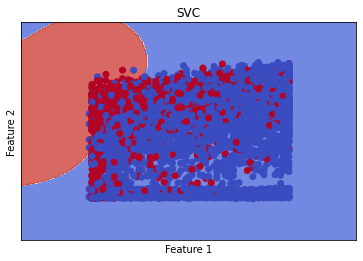

In [98]:
h = .02  # step size in the mesh

svc = svm.SVC().fit(X_train2, y_train)


# create a mesh to plot in
x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].


Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("SVC")

plt.show()

In [99]:
h = .02  # step size in the mesh

svc = svm.NuSVC().fit(X_train2, y_train)


# create a mesh to plot in
x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].


Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("NuSVC")

plt.show()

Feature 1: tenure / Feature 2: Monthly Charges

In [100]:
h = .02  # step size in the mesh
X_train = X_train[:, 0:2]

svc = svm.SVC().fit(X_train, y_train)
nu_svc = svm.NuSVC().fit(X_train, y_train)
linear_svc = svm.LinearSVC().fit(X_train, y_train)

# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC',
          'NuSVC',
          'LinearSVC']


for i, clf in enumerate((svc, nu_svc, linear_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()